<a href="https://colab.research.google.com/github/jhgil92/kaggle_santander/blob/master/santander_eda_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kaggle Study - Santander Product Recommendation**

* 구글 드라이에 있는 데이터를 로드해보자.
* 참고 : http://redapply.tistory.com/entry/Colaboratory-%EA%B5%AC%EA%B8%80-%EB%93%9C%EB%9D%BC%EC%9D%B4%EB%B8%8C-%EC%97%B0%EB%8F%99

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# load data
import pandas as pd
import numpy as np

trn = pd.read_csv('/content/gdrive/My Drive/santander/train_ver2.csv')
tst = pd.read_csv('/content/gdrive/My Drive/santander/test_ver2.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# train, test data의 크기를 확인
print("train : ", trn.shape)
print("test : ", tst.shape)

train :  (13647309, 48)
test :  (929615, 24)


* 훈련 데이터가 어떻게 생겼는지 확인해보자

In [4]:
trn.head()

# trn.head().pd.to_csv("trn_head.csv", mode="w")

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


* 구글시트에서 확인 -> https://docs.google.com/spreadsheets/d/1XF2OGFg3XZC2Z3jUdi-rlNQ8_SO0myPMfc-TKfmTjok/edit?usp=sharing

In [5]:
trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
fecha_dato               object
ncodpers                 int64
ind_empleado             object
pais_residencia          object
sexo                     object
age                      object
fecha_alta               object
ind_nuevo                float64
antiguedad               object
indrel                   float64
ult_fec_cli_1t           object
indrel_1mes              object
tiprel_1mes              object
indresi                  object
indext                   object
conyuemp                 object
canal_entrada            object
indfall                  object
tipodom                  float64
cod_prov                 float64
nomprov                  object
ind_actividad_cliente    float64
renta                    float64
segmento                 object
ind_ahor_fin_ult1        int64
ind_aval_fin_ult1        int64
ind_cco_fin_ult1         int64
ind_cder_fin_ult1  

* 머신러닝 모델 학습을 위해서는 훈련 데이터의 타입이 모두 int 혹은 float이어야 한다. (45page)
* int, float으로 변환하거나 혹은 적절히 dummy화?
* 2.2GB의 csv 파일을 pandas로 read하니 4.9GB 메모리를 차지

In [6]:
num_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['int64', 'float64']]
# 위 코드는 리스트 표현식의 일종 (참고 : https://dojang.io/mod/page/view.php?id=982)

print(len(num_cols))
# 7개의 데이터가 수치형으로 되어 있음

trn[num_cols].describe()

7


,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


* 범주형으로 되어있는 데이터의 요약값

In [7]:
cat_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['O']]
# 0가 아니라 object로 진행해도 됨

print(len(cat_cols))
# 17개의 데이터가 범주형으로 되어 있음

trn[cat_cols].describe()

# age가 category데이터로 되어있으며 unique value가 235개나 되는데...

17


,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


* 예측변수가 될 product들이 어떻게 생겼는지 보자

In [8]:
product = trn.columns.tolist()[24:] # product의 name을 리스트로 저장

for col in product:
    uniq = np.unique(trn[col].astype(str))
    print('-'*50)
    print('# product name : {}, n_uniq : {}, uniq : {}'.format(col, len(uniq), uniq))

--------------------------------------------------
# product name : ind_ahor_fin_ult1, n_uniq : 2, uniq : ['0' '1']
--------------------------------------------------
# product name : ind_aval_fin_ult1, n_uniq : 2, uniq : ['0' '1']
--------------------------------------------------
# product name : ind_cco_fin_ult1, n_uniq : 2, uniq : ['0' '1']
--------------------------------------------------
# product name : ind_cder_fin_ult1, n_uniq : 2, uniq : ['0' '1']
--------------------------------------------------
# product name : ind_cno_fin_ult1, n_uniq : 2, uniq : ['0' '1']
--------------------------------------------------
# product name : ind_ctju_fin_ult1, n_uniq : 2, uniq : ['0' '1']
--------------------------------------------------
# product name : ind_ctma_fin_ult1, n_uniq : 2, uniq : ['0' '1']
--------------------------------------------------
# product name : ind_ctop_fin_ult1, n_uniq : 2, uniq : ['0' '1']
--------------------------------------------------
# product name : ind_ct

* product 칼럼은 보유여부에 따라 0 또는 1로 표현되어 있음
* ind_nomina_ult1, ind_nom_pens_ult1은 nan도 포함되어 있다. 추후에 전처리 과정에서 처리가 필요할 듯

In [9]:
def value_counts_add_percent(ser):
    df = pd.DataFrame({'count':ser.value_counts(dropna=False),
                     'percent':ser.value_counts(dropna=False) / len(ser) * 100})
    return df

for col in product:
    print('-'*50)
    result = value_counts_add_percent(trn[col])
    print('# product name : {}, \n{}'.format(col, result))

--------------------------------------------------
# product name : ind_ahor_fin_ult1, 
      count    percent
0  13645913  99.989771
1      1396   0.010229
--------------------------------------------------
# product name : ind_aval_fin_ult1, 
      count    percent
0  13646993  99.997685
1       316   0.002315
--------------------------------------------------
# product name : ind_cco_fin_ult1, 
     count    percent
1  8945588  65.548366
0  4701721  34.451634
--------------------------------------------------
# product name : ind_cder_fin_ult1, 
      count    percent
0  13641933  99.960608
1      5376   0.039392
--------------------------------------------------
# product name : ind_cno_fin_ult1, 
      count    percent
0  12543689  91.913278
1   1103620   8.086722
--------------------------------------------------
# product name : ind_ctju_fin_ult1, 
      count    percent
0  13518012  99.052582
1    129297   0.947418
--------------------------------------------------
# product na

In [10]:
print('number of rows = ', len(trn['ncodpers']), ' number of custoemr', len(np.unique(trn['ncodpers'].astype(str))))

# 95만명의 고객 데이터, 1364만건의 데이터

number of rows =  13647309  number of custoemr 956645


In [11]:
print(len(np.unique(trn['fecha_dato'].astype(str))))
print(np.unique(trn['fecha_dato'].astype(str)))

# train 데이터에는 15년도 1월부터 16년도 5월까지의 고객 데이터가 시점별로 기록되어 있음

17
['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']


In [12]:
print(len(np.unique(tst['fecha_dato'].astype(str))))
print(np.unique(tst['fecha_dato'].astype(str)))

# test 데이터에는 16년도 6월의 고객 데이터가 담겨져있음

1
['2016-06-28']


In [13]:
# 범주형 변수는 어떤 분포를 가지고 있을까?

for col in cat_cols:
    print('-'*50)
    result = value_counts_add_percent(trn[col])
    print('# category columns : {}, \n{}'.format(col, result))

--------------------------------------------------
# category columns : fecha_dato, 
             count   percent
2016-05-28  931453  6.825177
2016-04-28  928274  6.801883
2016-03-28  925076  6.778450
2016-02-28  920904  6.747880
2016-01-28  916269  6.713917
2015-12-28  912021  6.682790
2015-11-28  906109  6.639470
2015-10-28  892251  6.537926
2015-09-28  865440  6.341470
2015-08-28  843201  6.178515
2015-07-28  829817  6.080444
2015-06-28  632110  4.631756
2015-05-28  631957  4.630635
2015-04-28  630367  4.618984
2015-03-28  629209  4.610499
2015-02-28  627394  4.597199
2015-01-28  625457  4.583006
--------------------------------------------------
# category columns : ind_empleado, 
        count    percent
N    13610977  99.733779
NaN     27734   0.203220
B        3566   0.026130
F        2523   0.018487
A        2492   0.018260
S          17   0.000125
--------------------------------------------------
# category columns : pais_residencia, 
        count    percent
ES   13553710  9

In [14]:
# 범주형 변수의 고유값을 출력해보자

for col in cat_cols:
    uniq = np.unique(trn[col].astype(str))
    print('-'*50)
    print('# category columns {}, n_uniq = {} \n uniq value = {}' .format(col, len(uniq), uniq))

--------------------------------------------------
# category columns fecha_dato, n_uniq = 17 
 uniq value = ['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# category columns ind_empleado, n_uniq = 6 
 uniq value = ['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# category columns pais_residencia, n_uniq = 119 
 uniq value = ['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' '

* **데이터 시각화**

In [0]:
import matplotlib
import matplotlib.pyplot as plt
# Jupyter Notebook 내부에 그래프를 출력하도록 설정
%matplotlib inline
import seaborn as sns

--------------------------------------------------
col :  fecha_dato


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


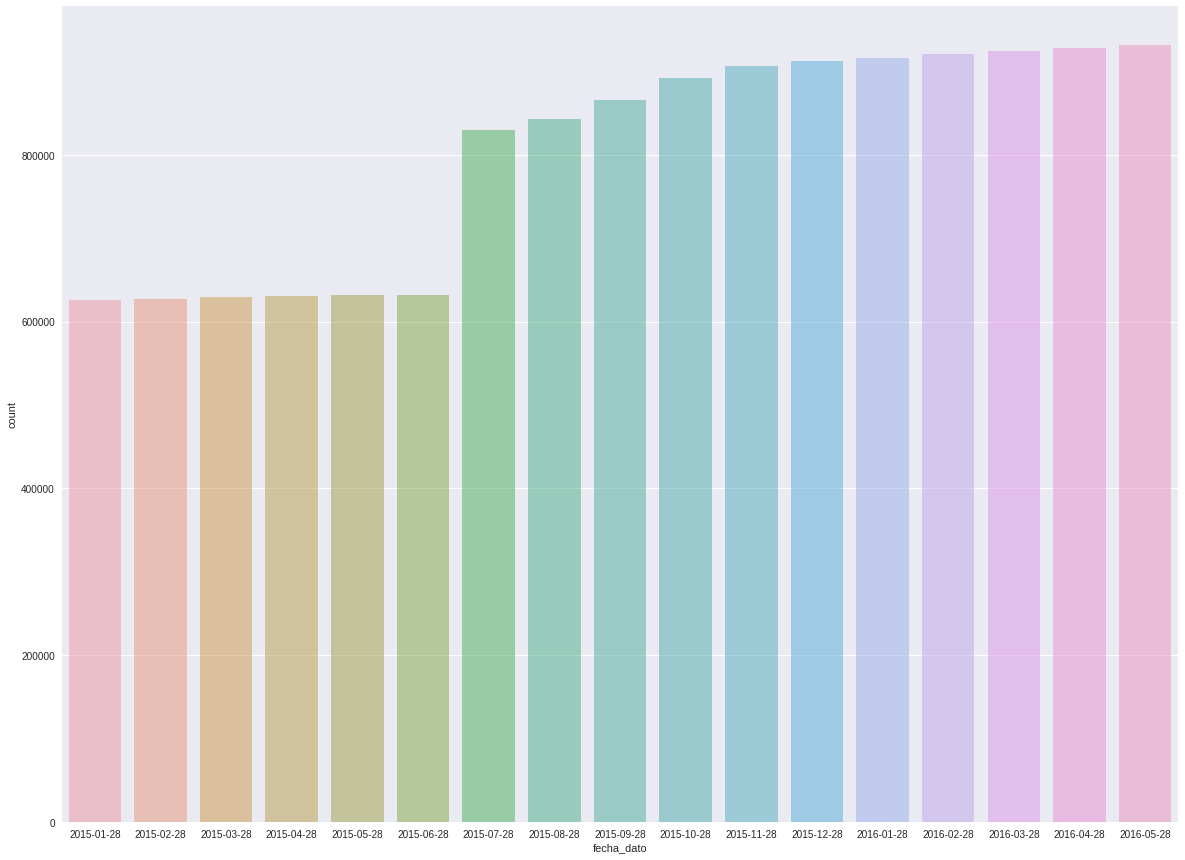

--------------------------------------------------
col :  ind_empleado


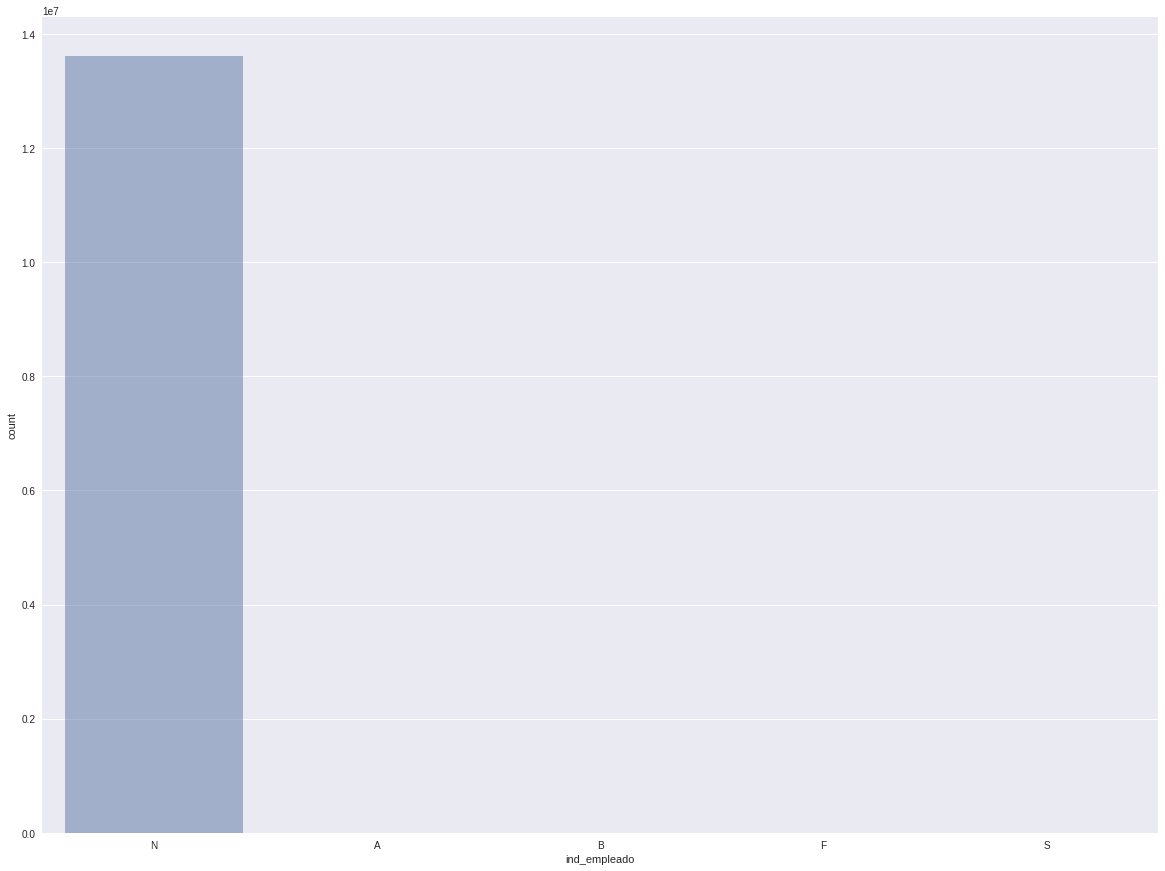

--------------------------------------------------
col :  pais_residencia


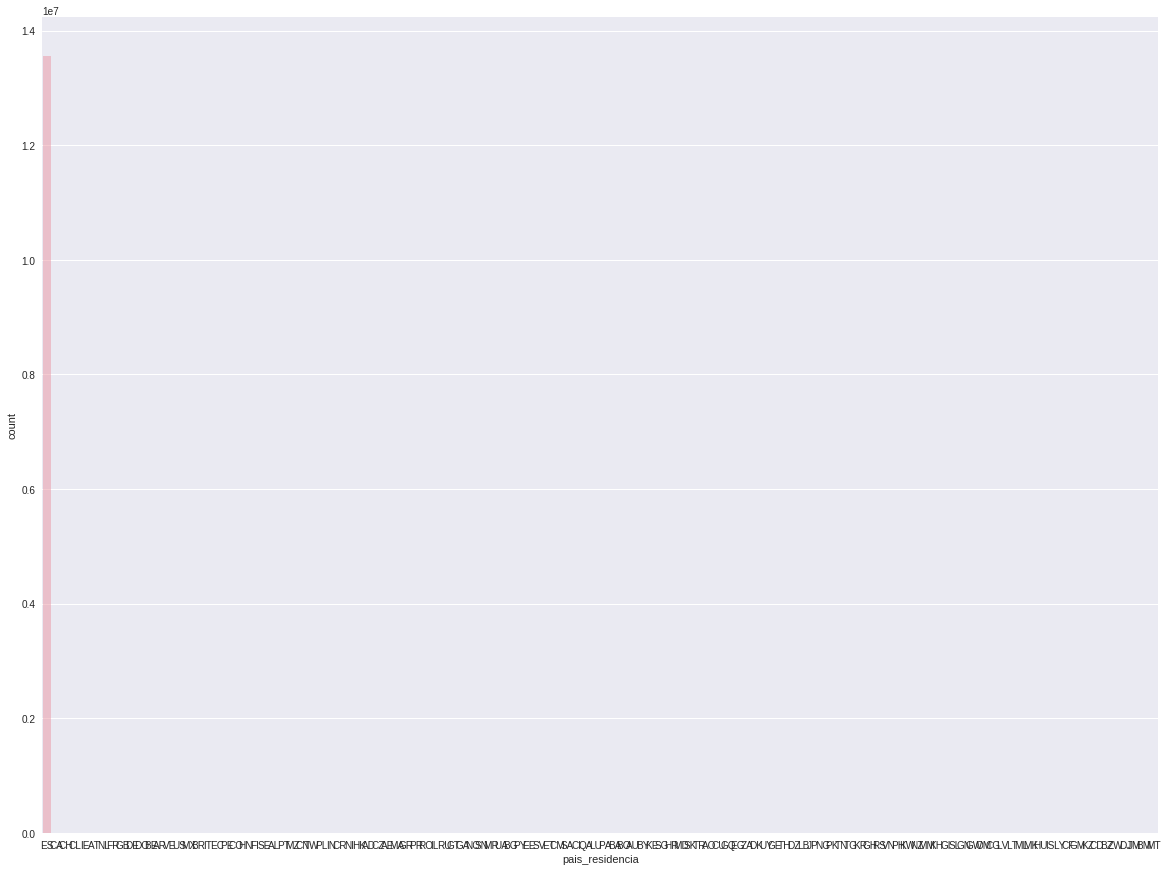

--------------------------------------------------
col :  sexo


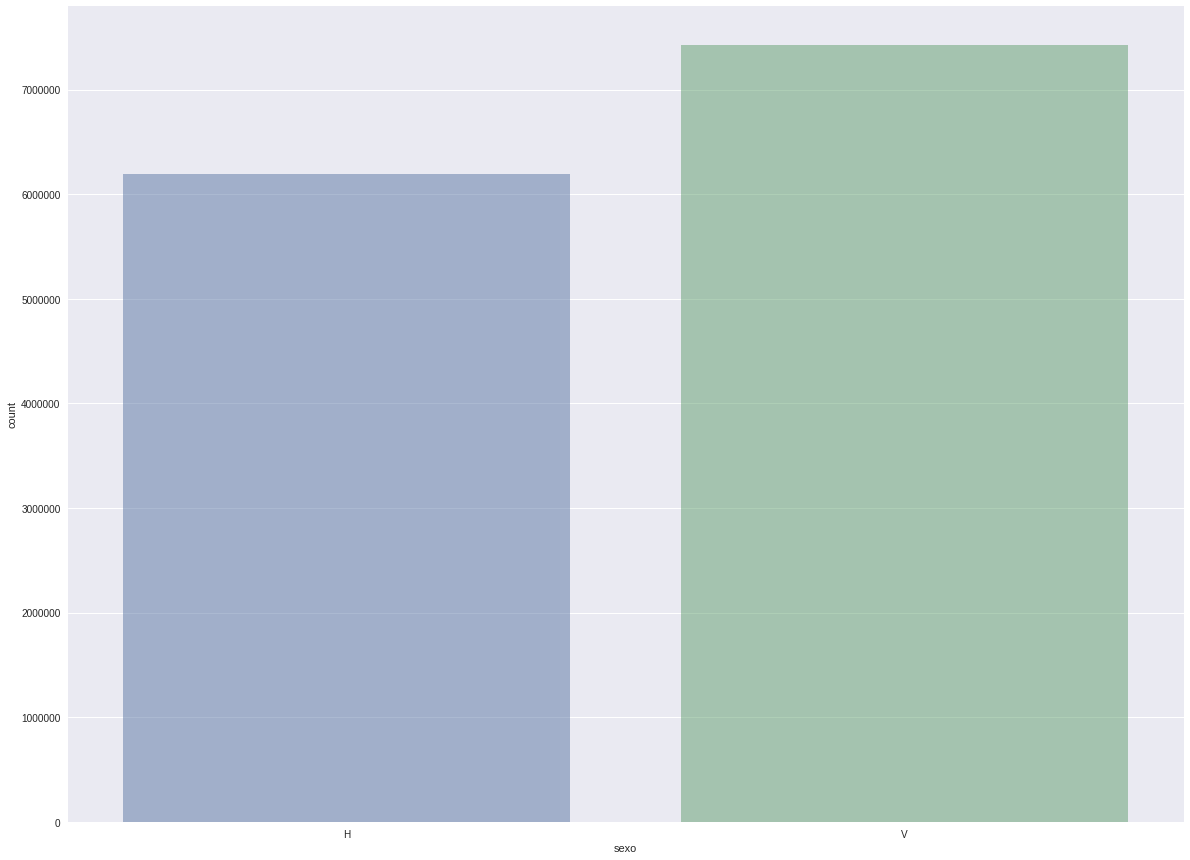

--------------------------------------------------
col :  age


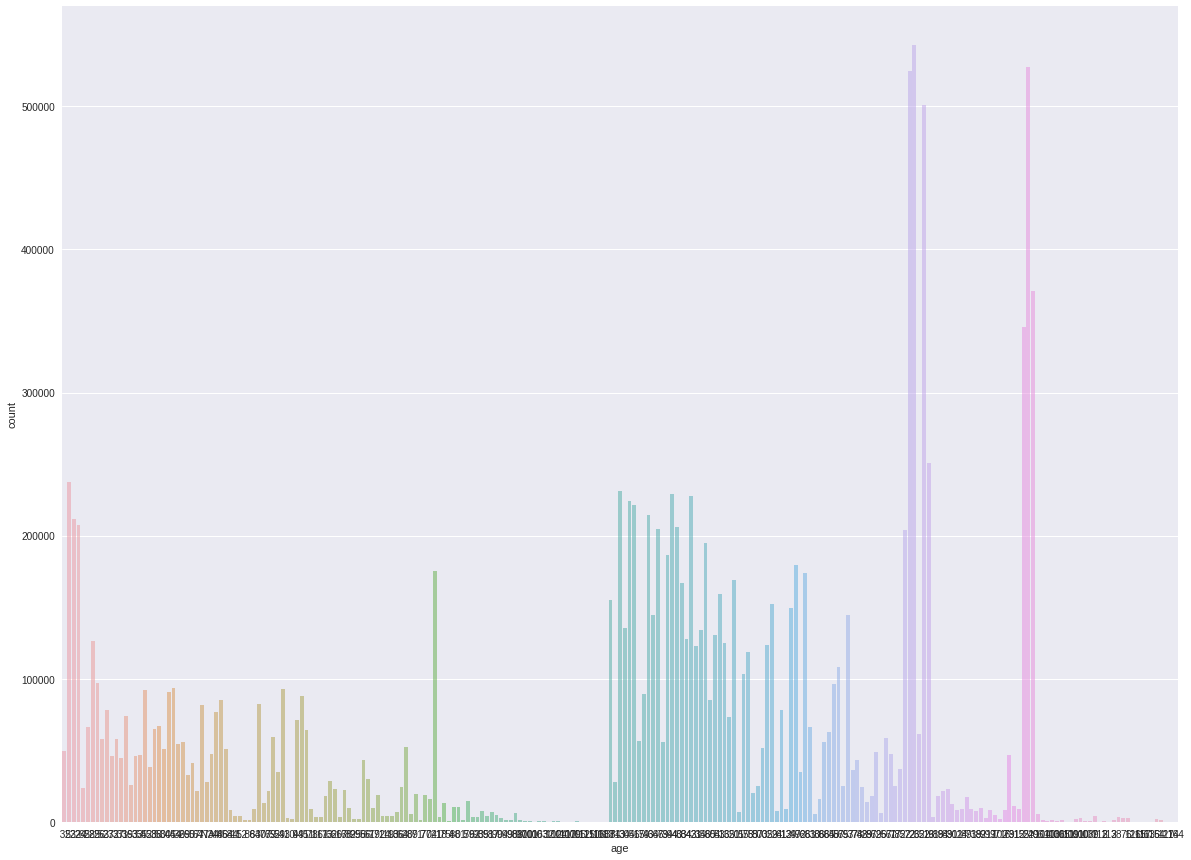

--------------------------------------------------
col :  fecha_alta


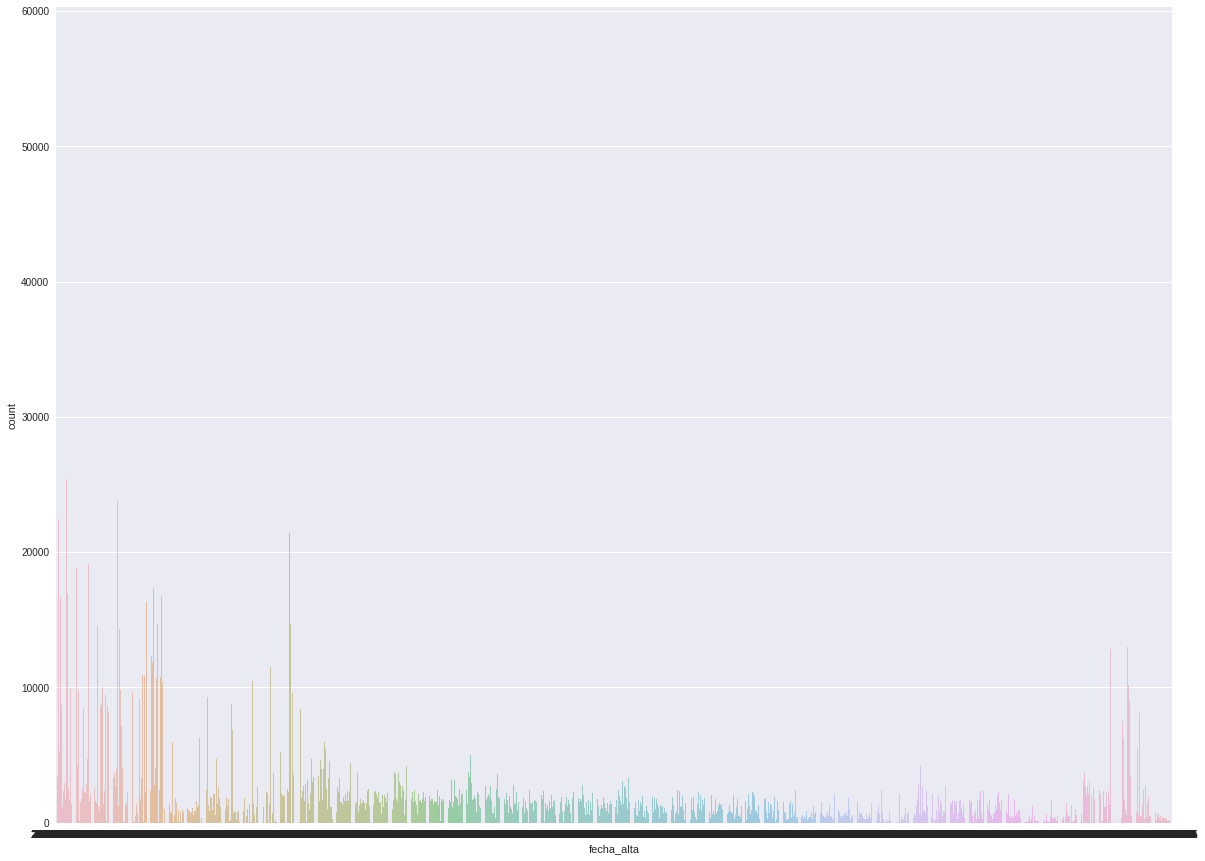

--------------------------------------------------
col :  ind_nuevo


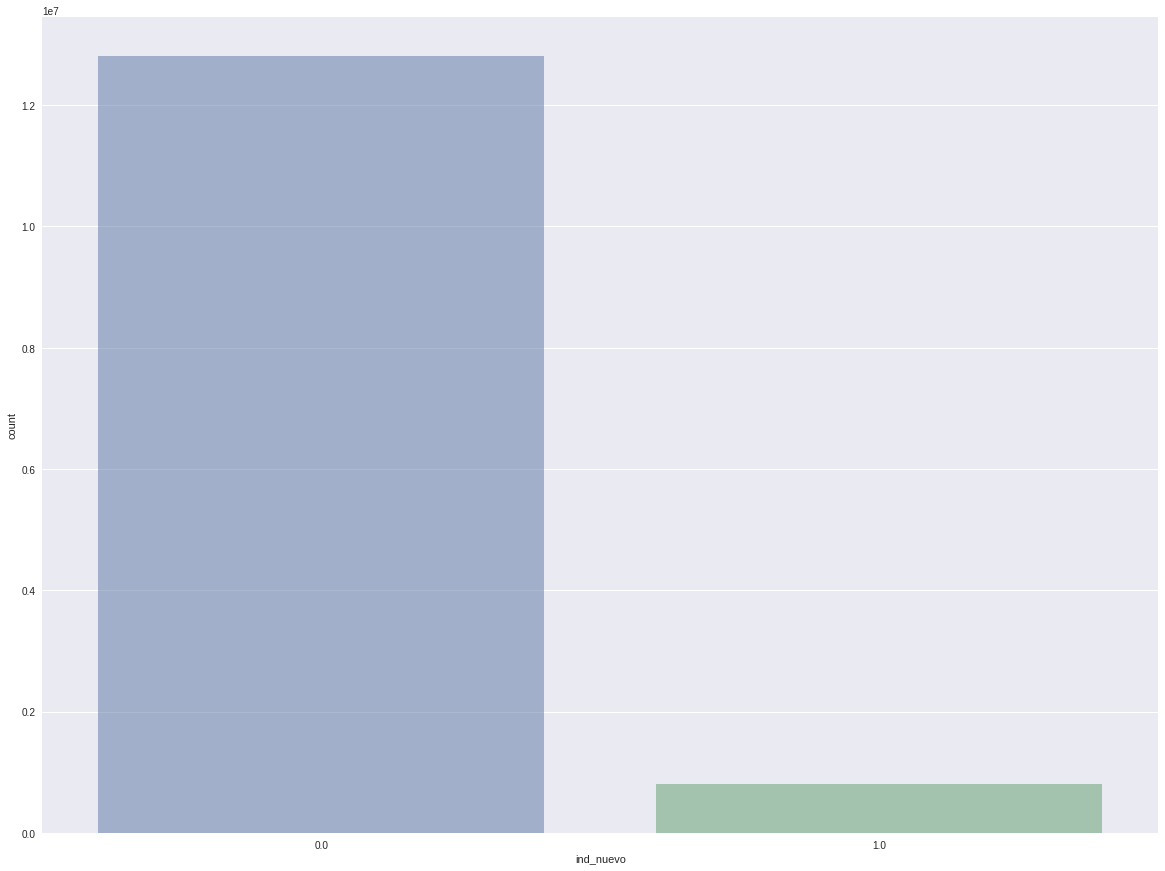

--------------------------------------------------
col :  antiguedad


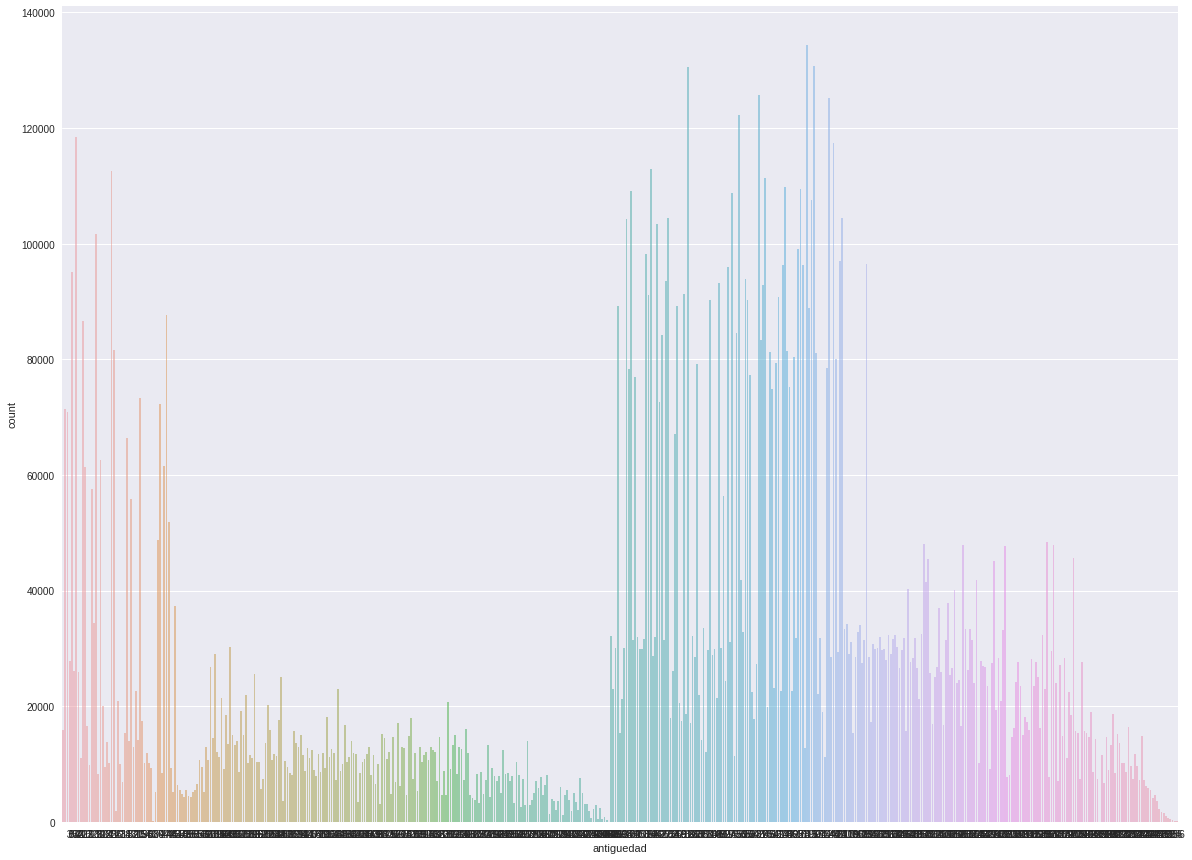

--------------------------------------------------
col :  indrel


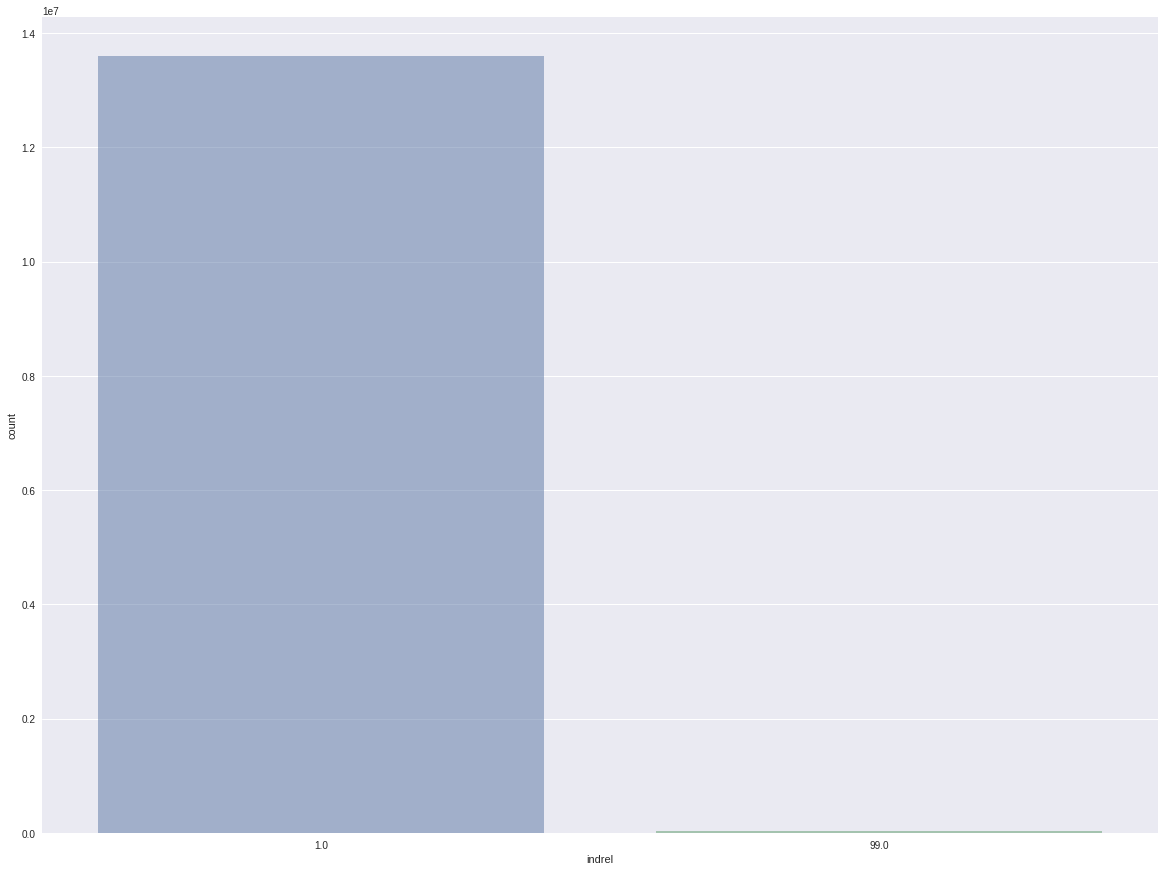

--------------------------------------------------
col :  ult_fec_cli_1t


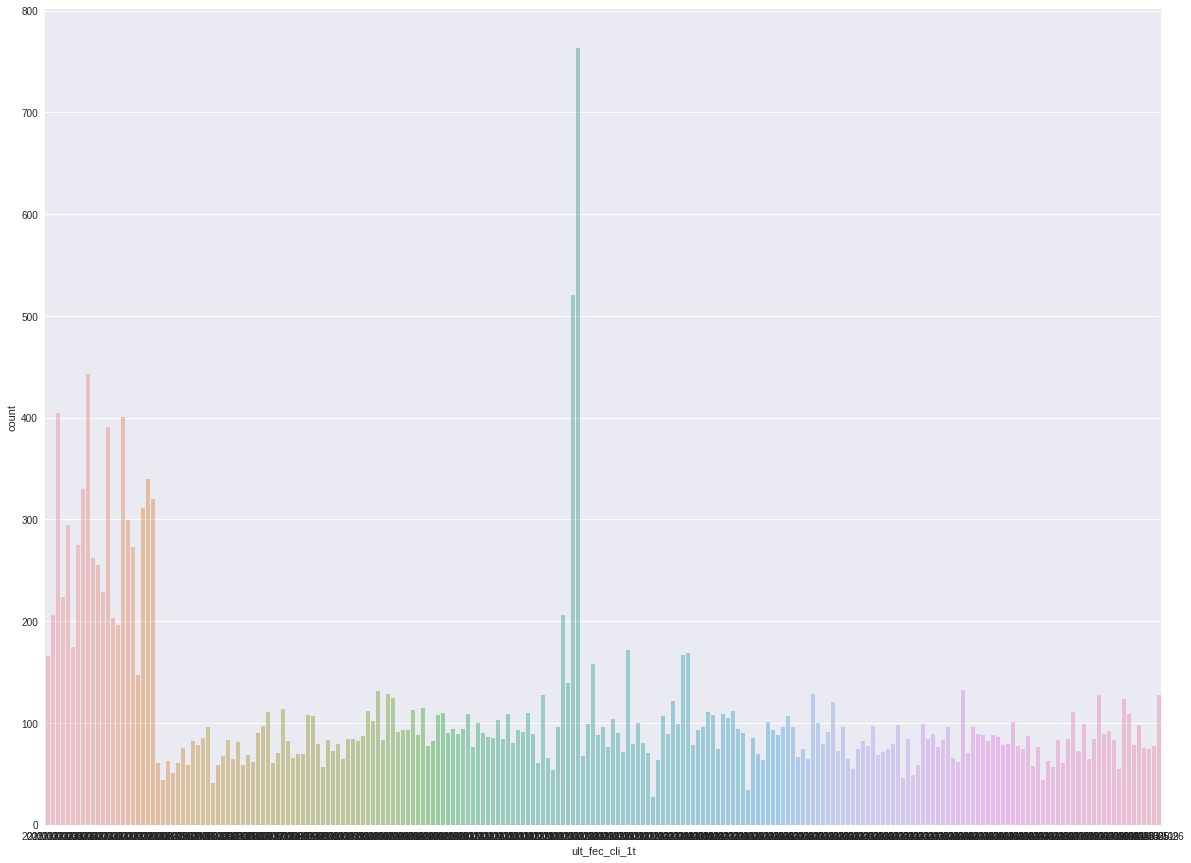

--------------------------------------------------
col :  indrel_1mes


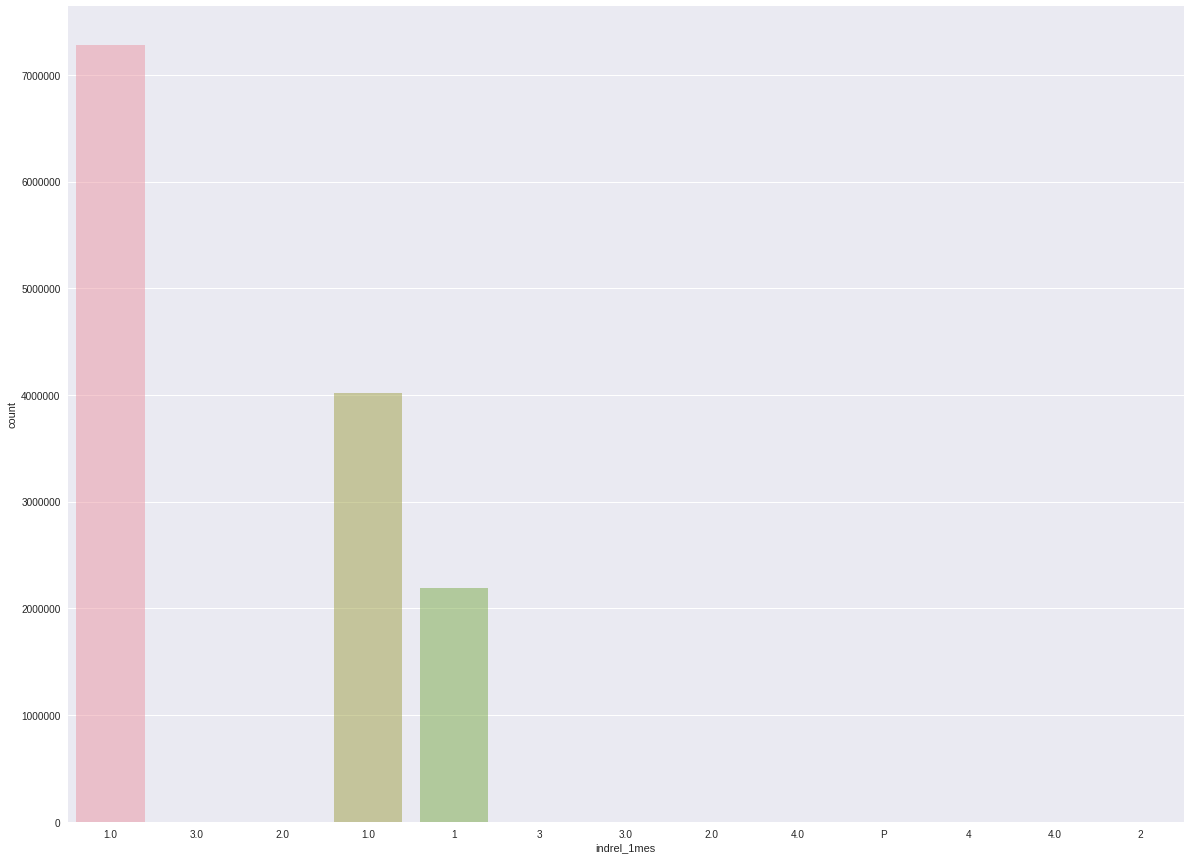

--------------------------------------------------
col :  tiprel_1mes


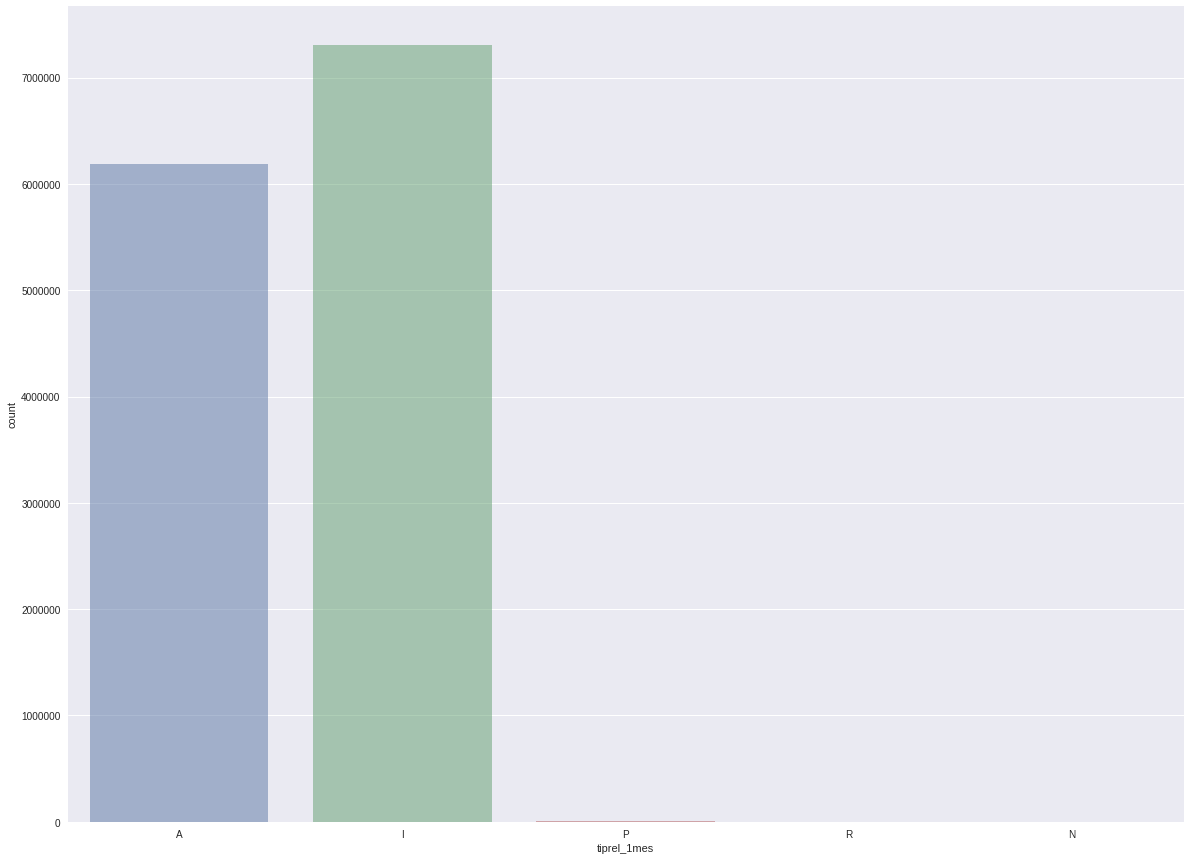

--------------------------------------------------
col :  indresi


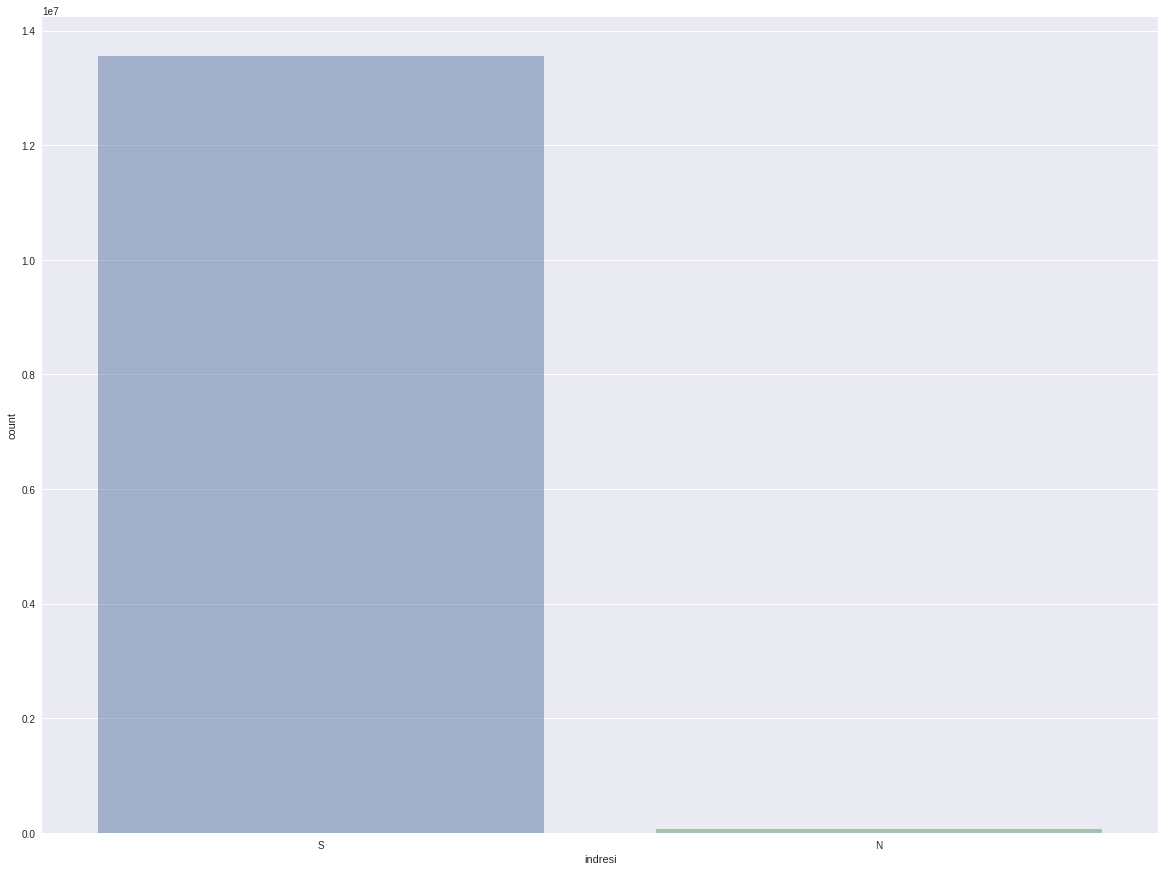

--------------------------------------------------
col :  indext


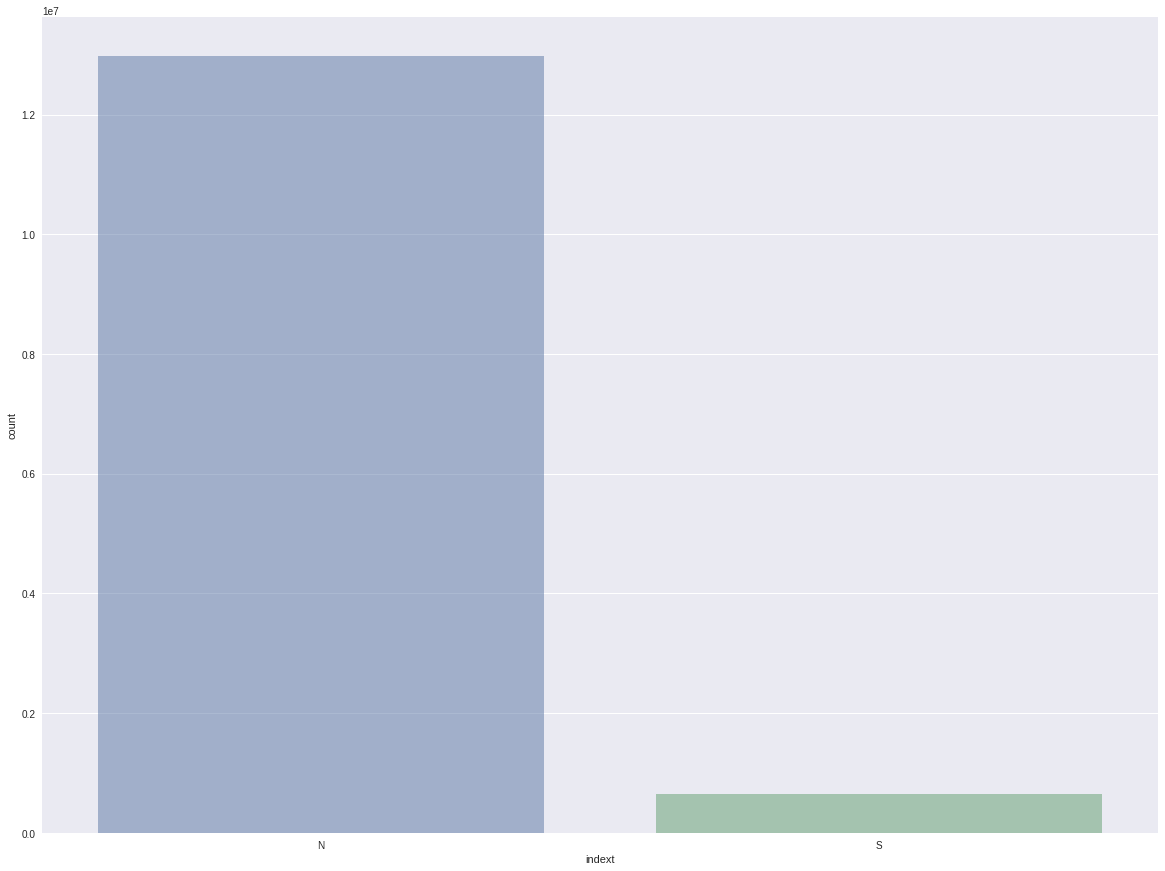

--------------------------------------------------
col :  conyuemp


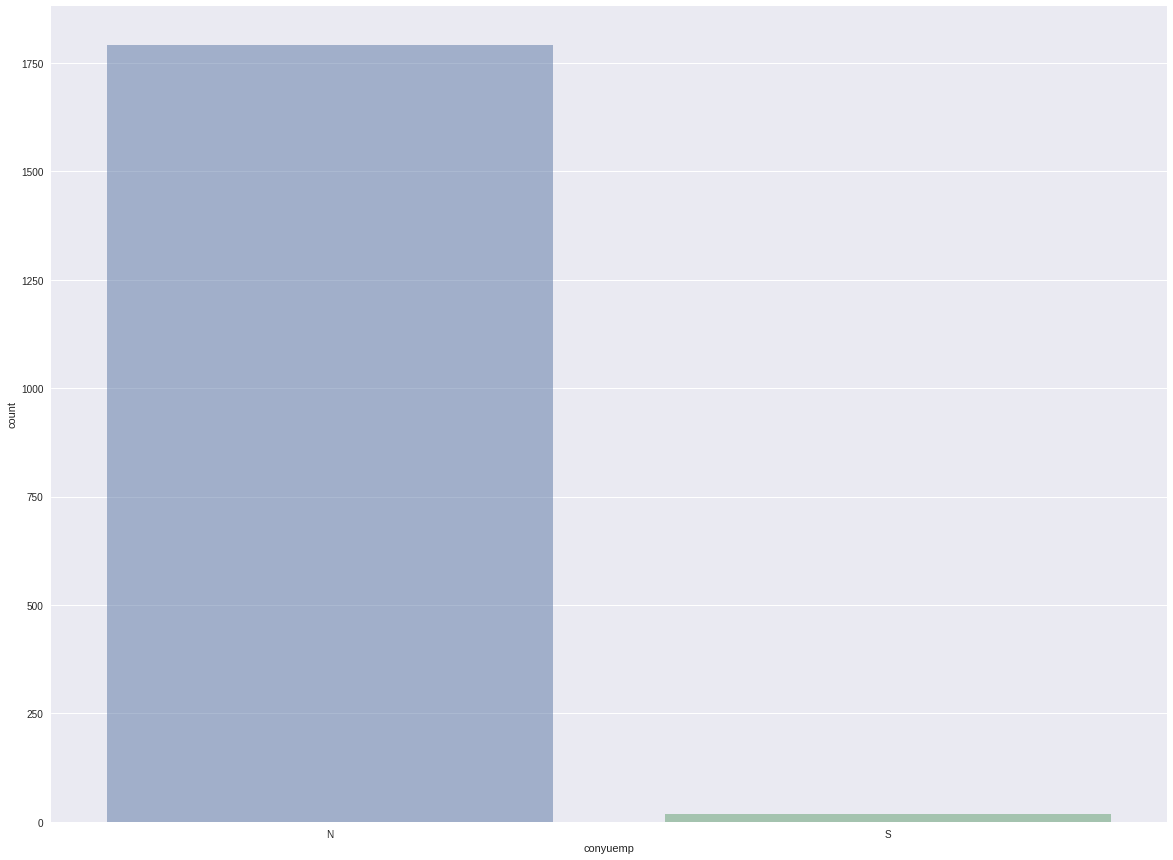

--------------------------------------------------
col :  canal_entrada


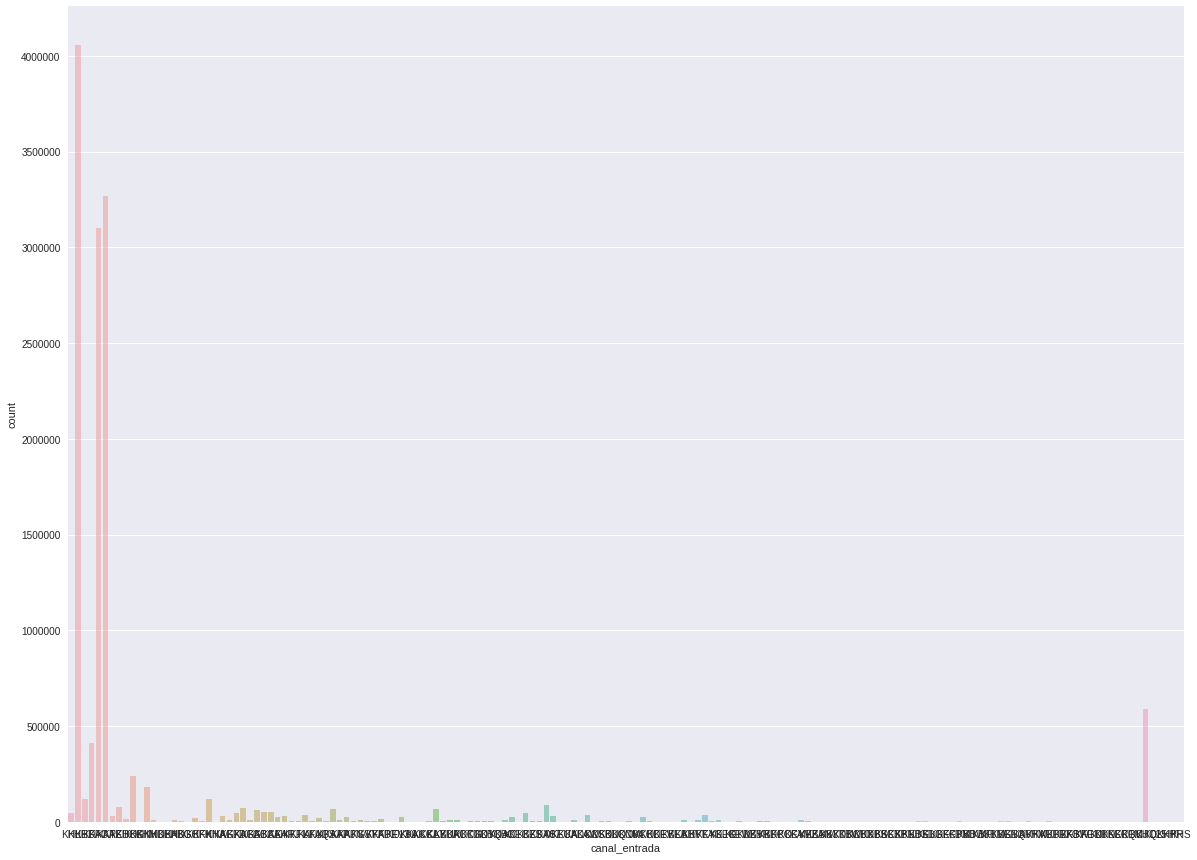

--------------------------------------------------
col :  indfall


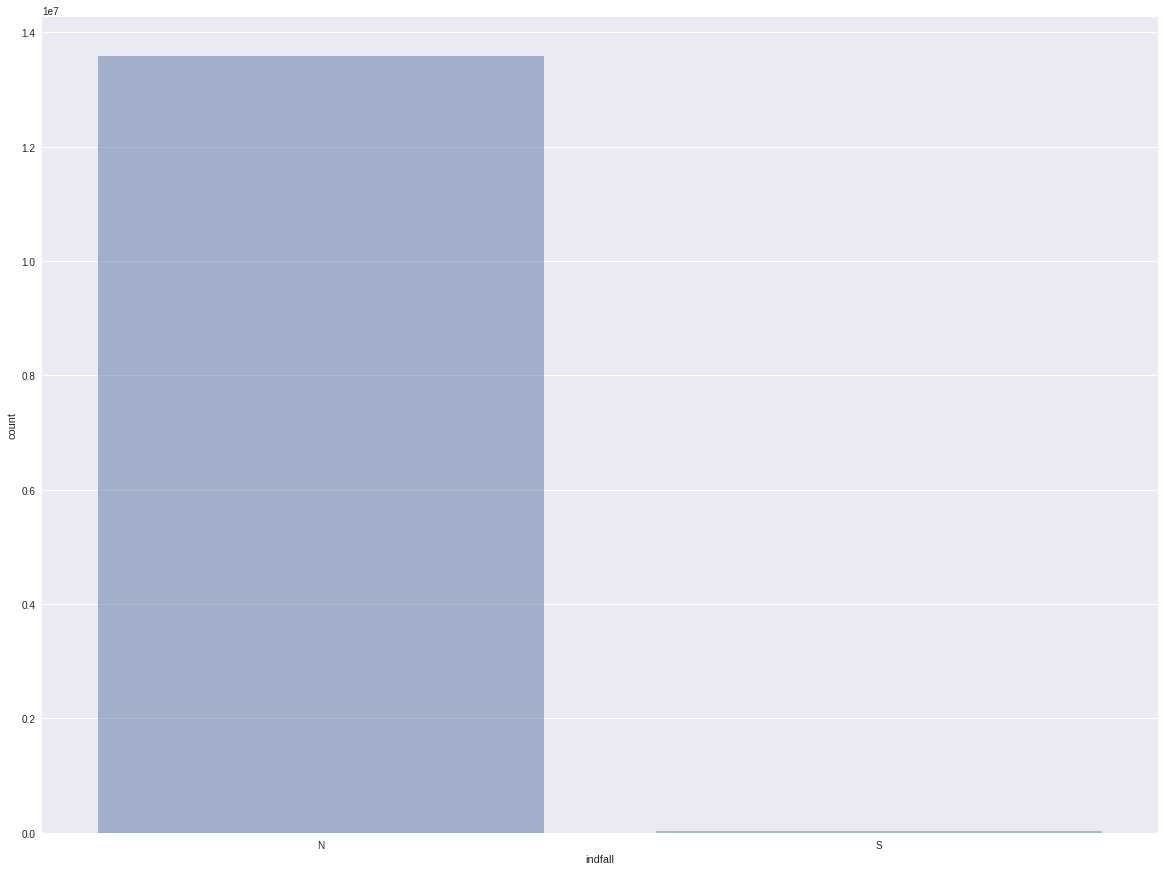

--------------------------------------------------
col :  tipodom


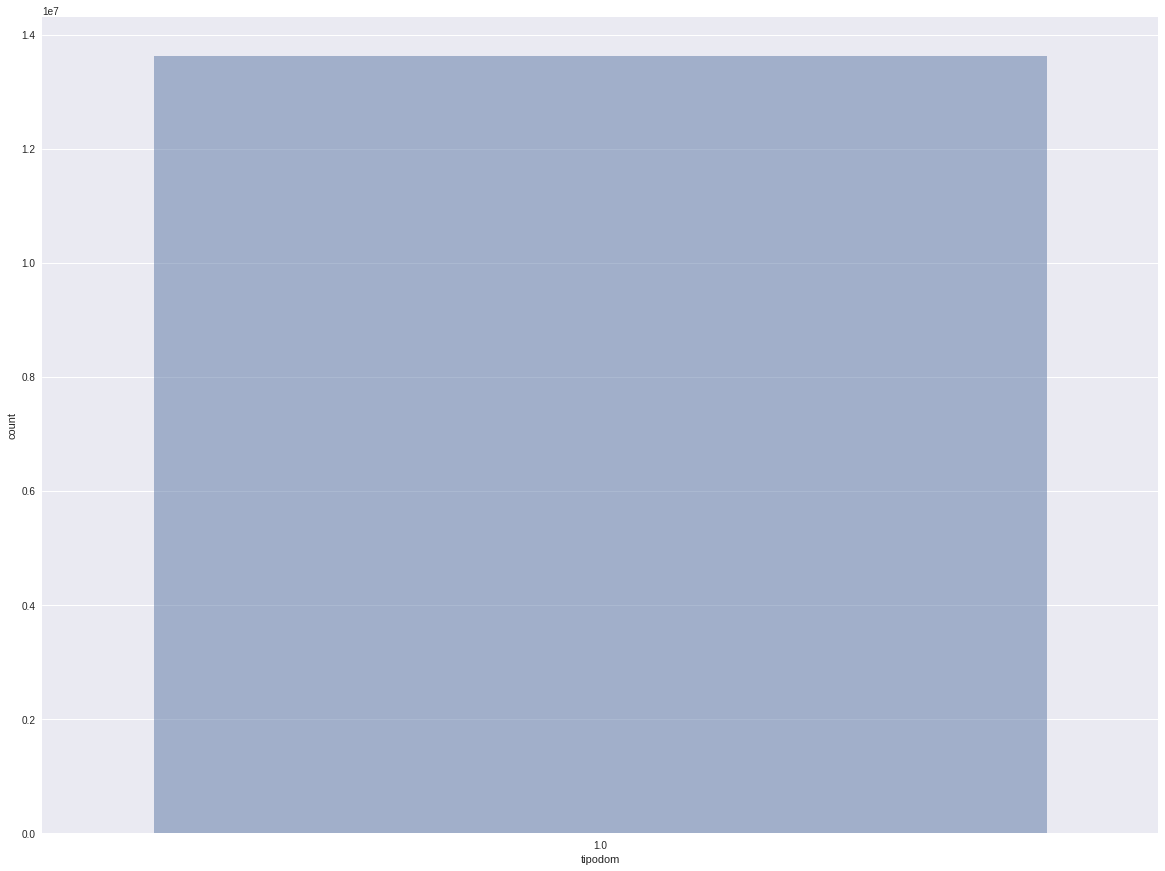

--------------------------------------------------
col :  cod_prov


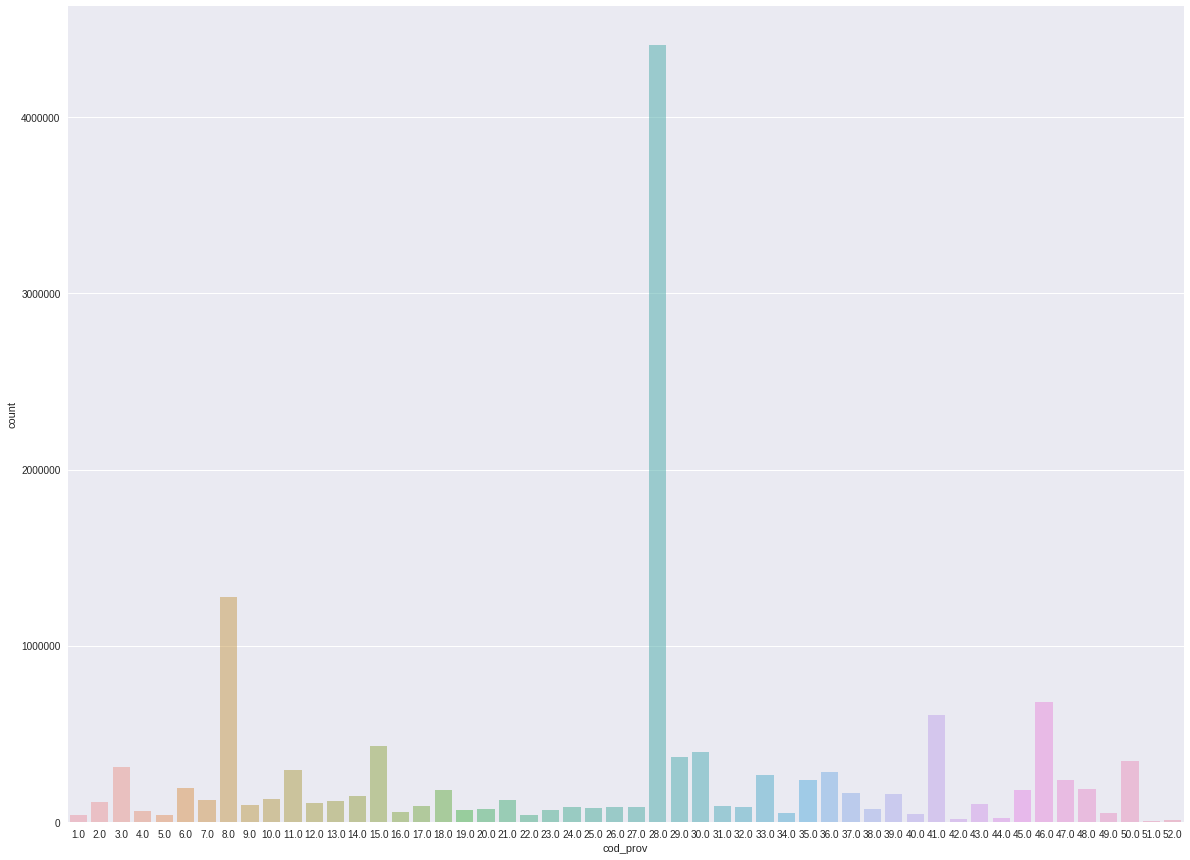

--------------------------------------------------
col :  nomprov


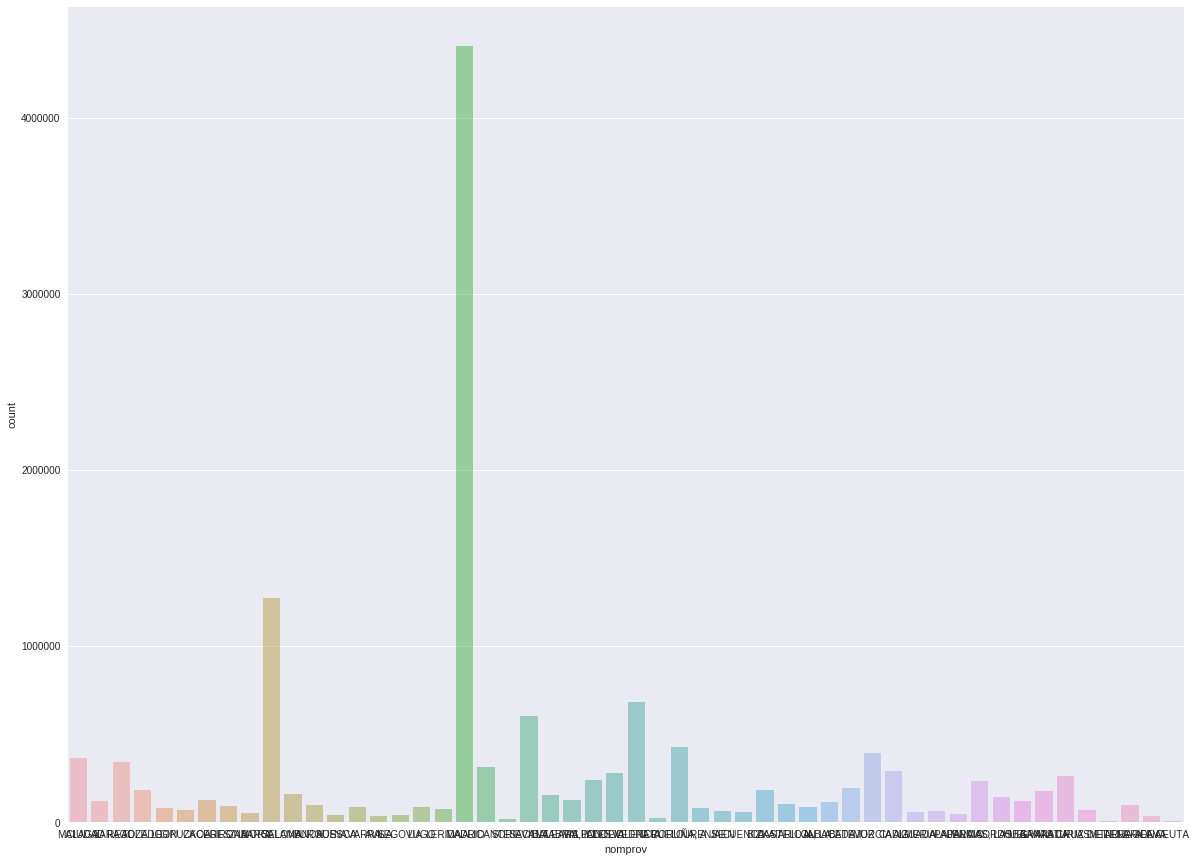

--------------------------------------------------
col :  ind_actividad_cliente


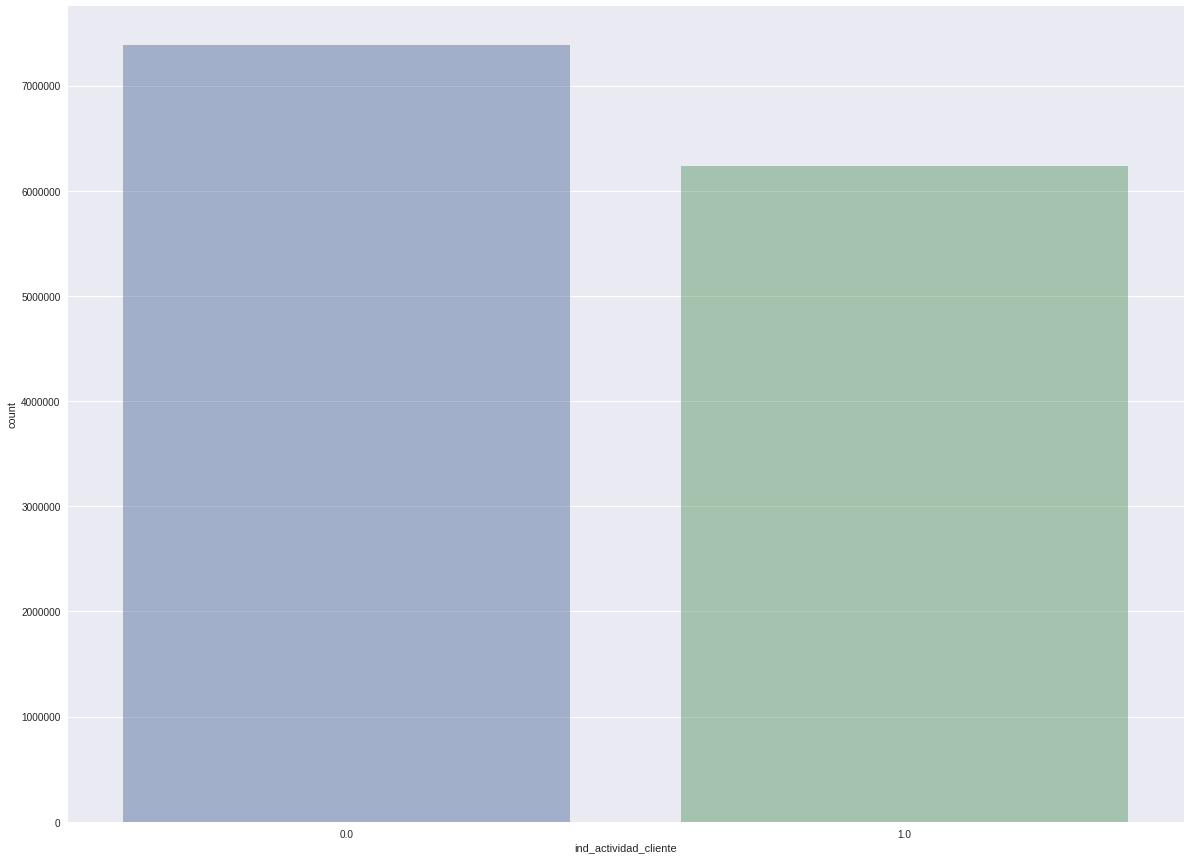

--------------------------------------------------
col :  segmento


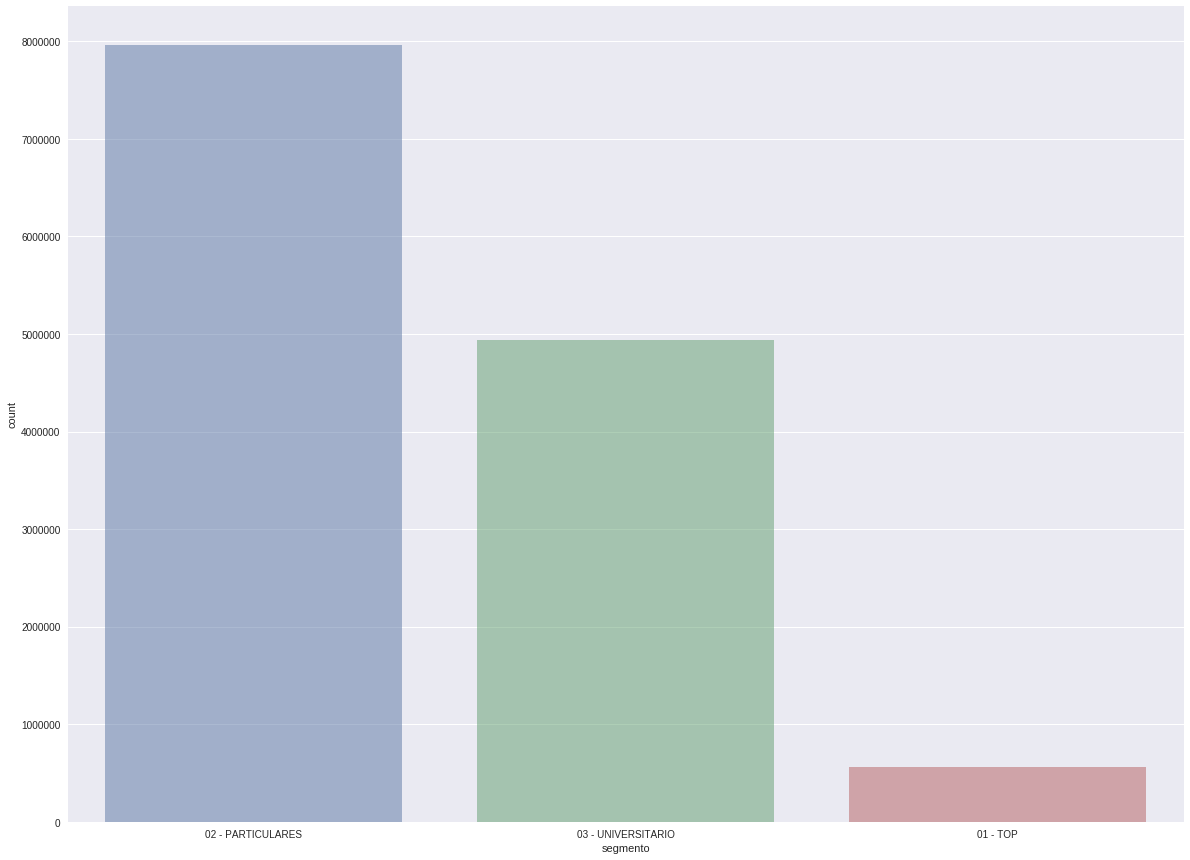

--------------------------------------------------
col :  ind_ahor_fin_ult1


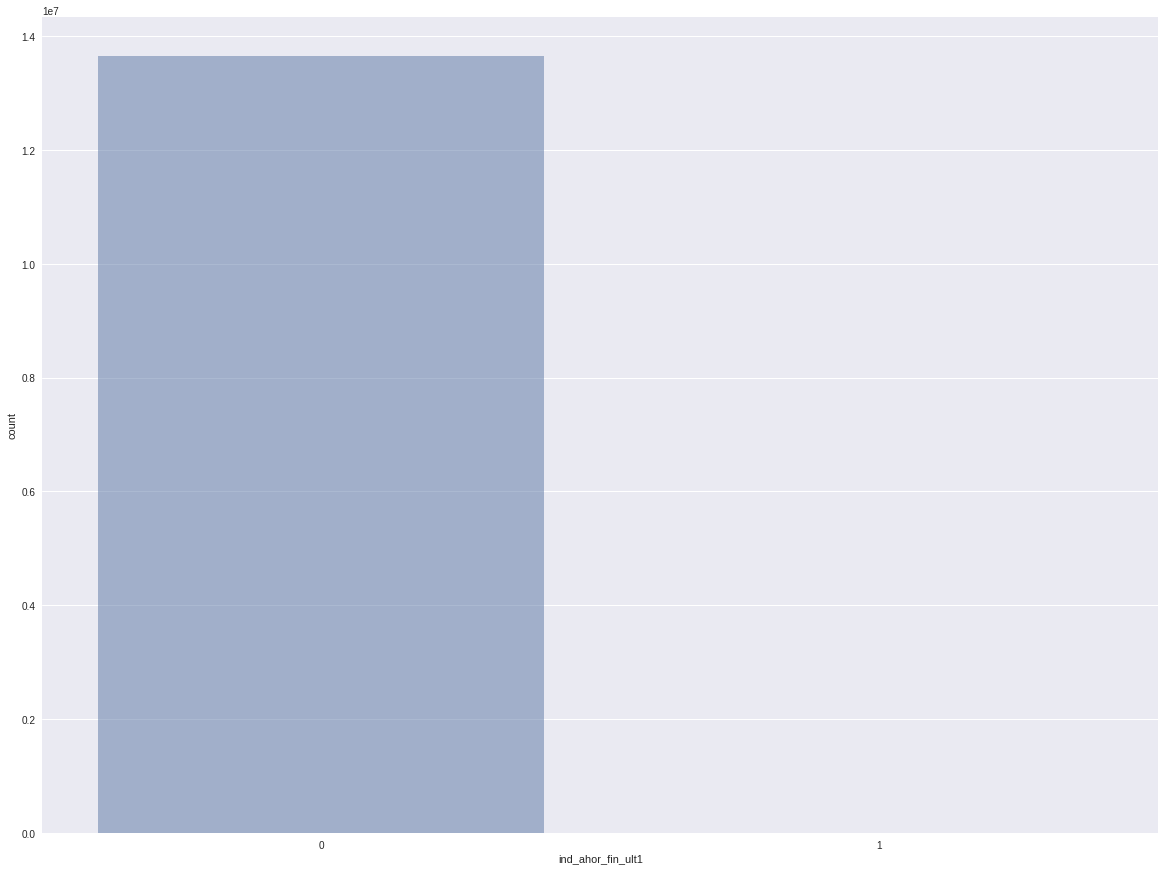

--------------------------------------------------
col :  ind_aval_fin_ult1


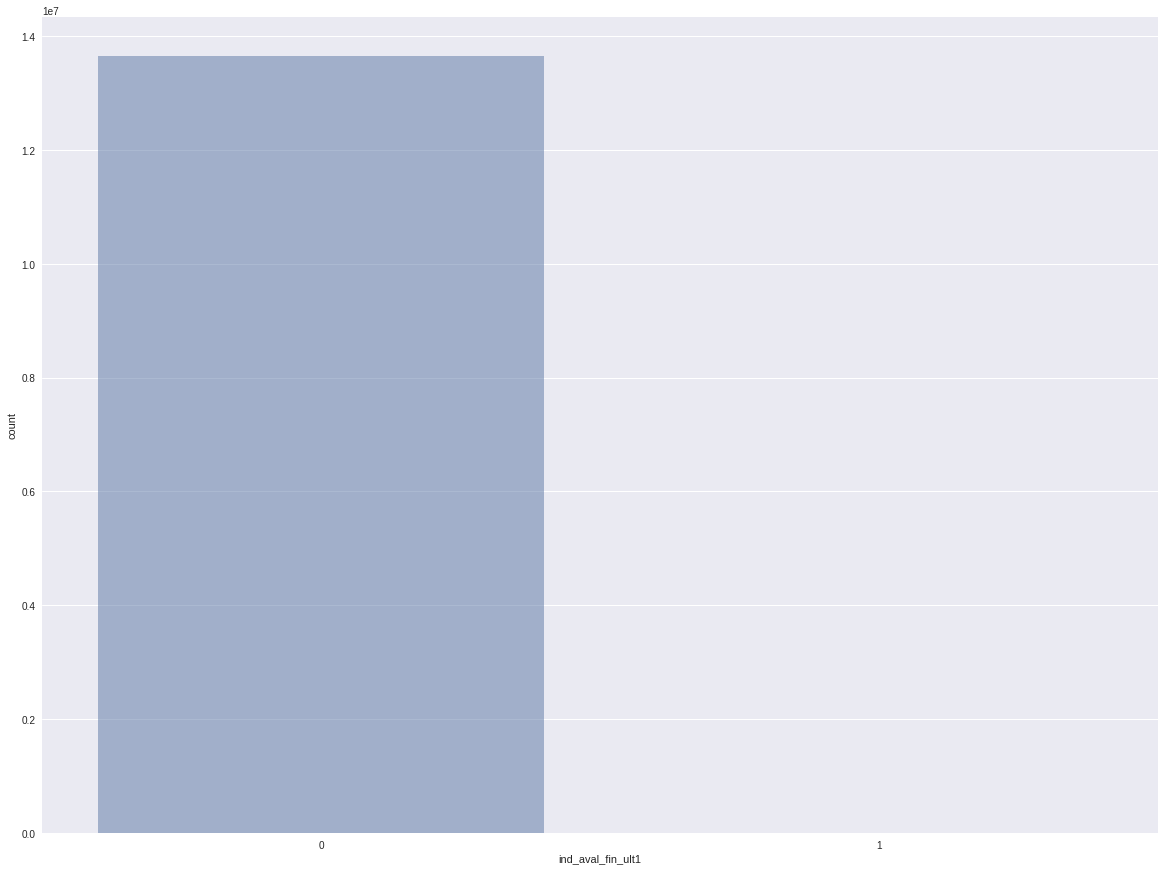

--------------------------------------------------
col :  ind_cco_fin_ult1


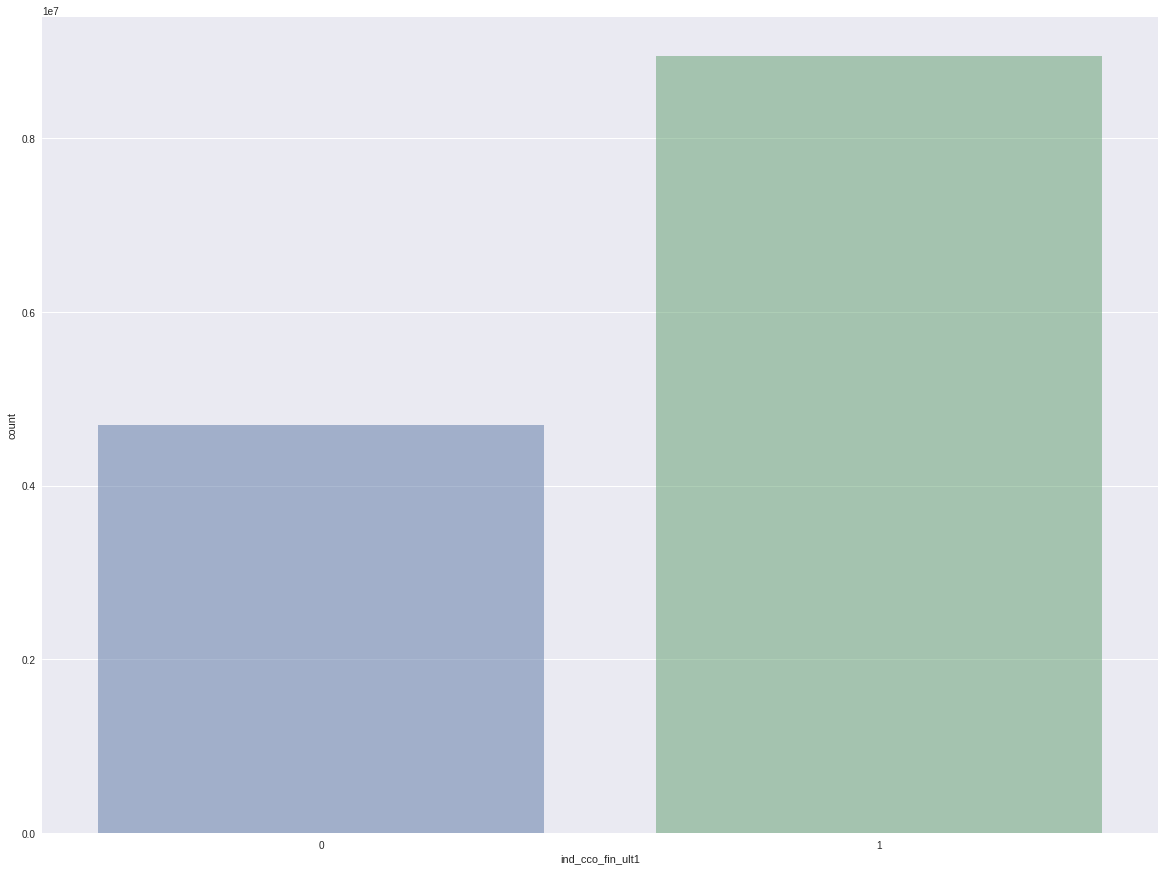

--------------------------------------------------
col :  ind_cder_fin_ult1


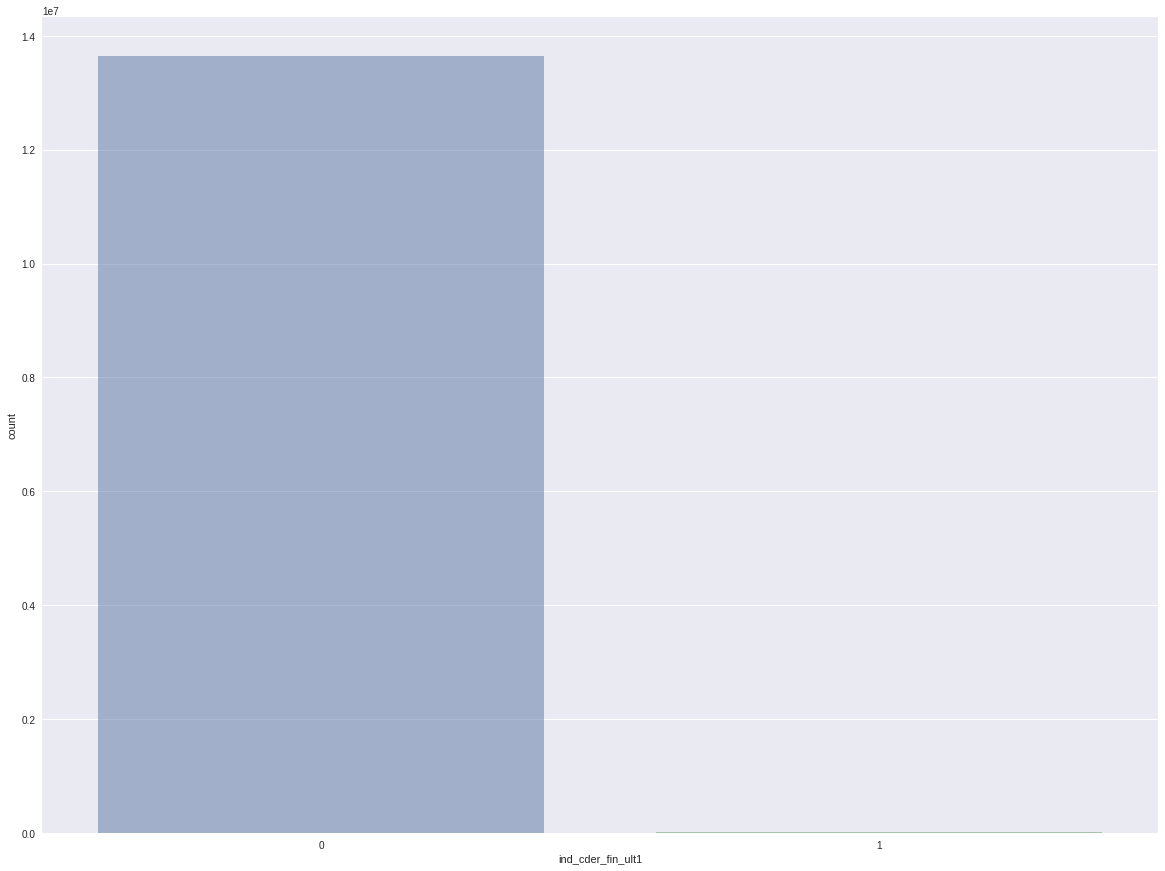

--------------------------------------------------
col :  ind_cno_fin_ult1


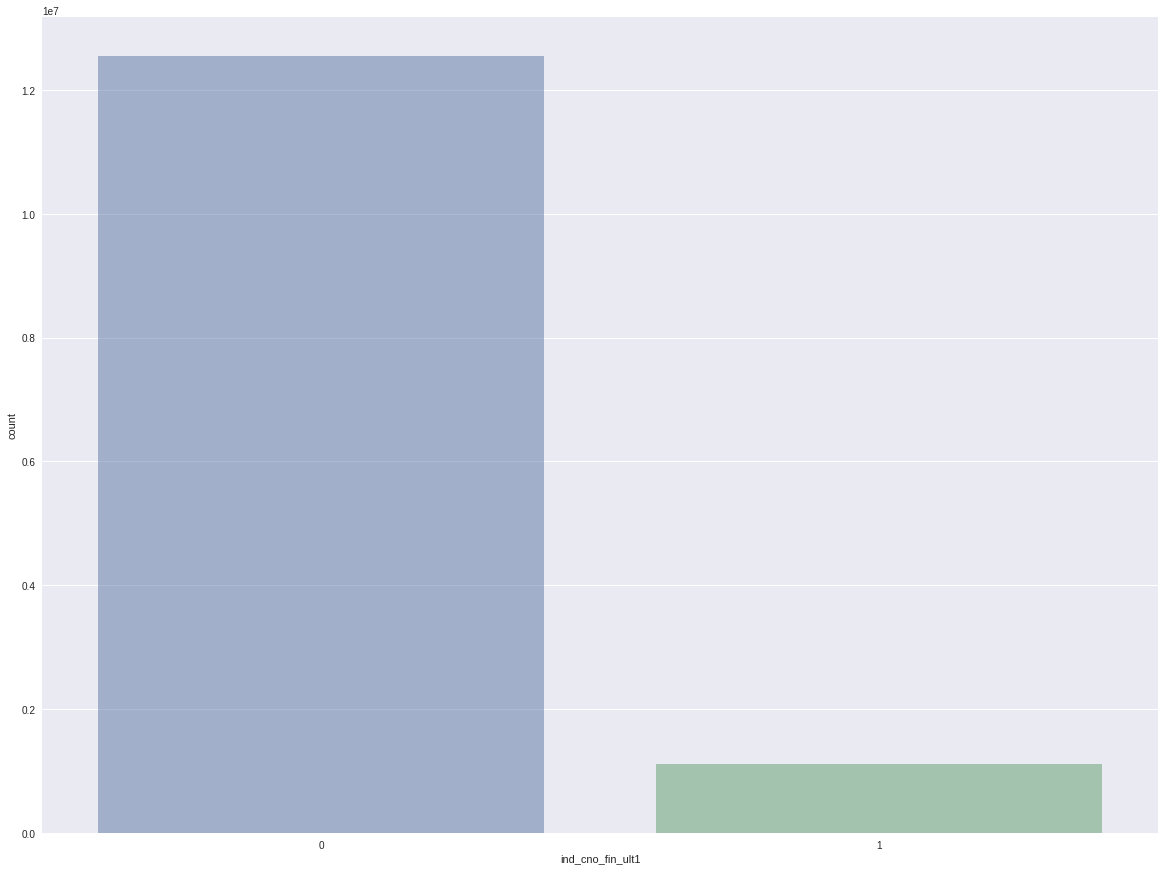

--------------------------------------------------
col :  ind_ctju_fin_ult1


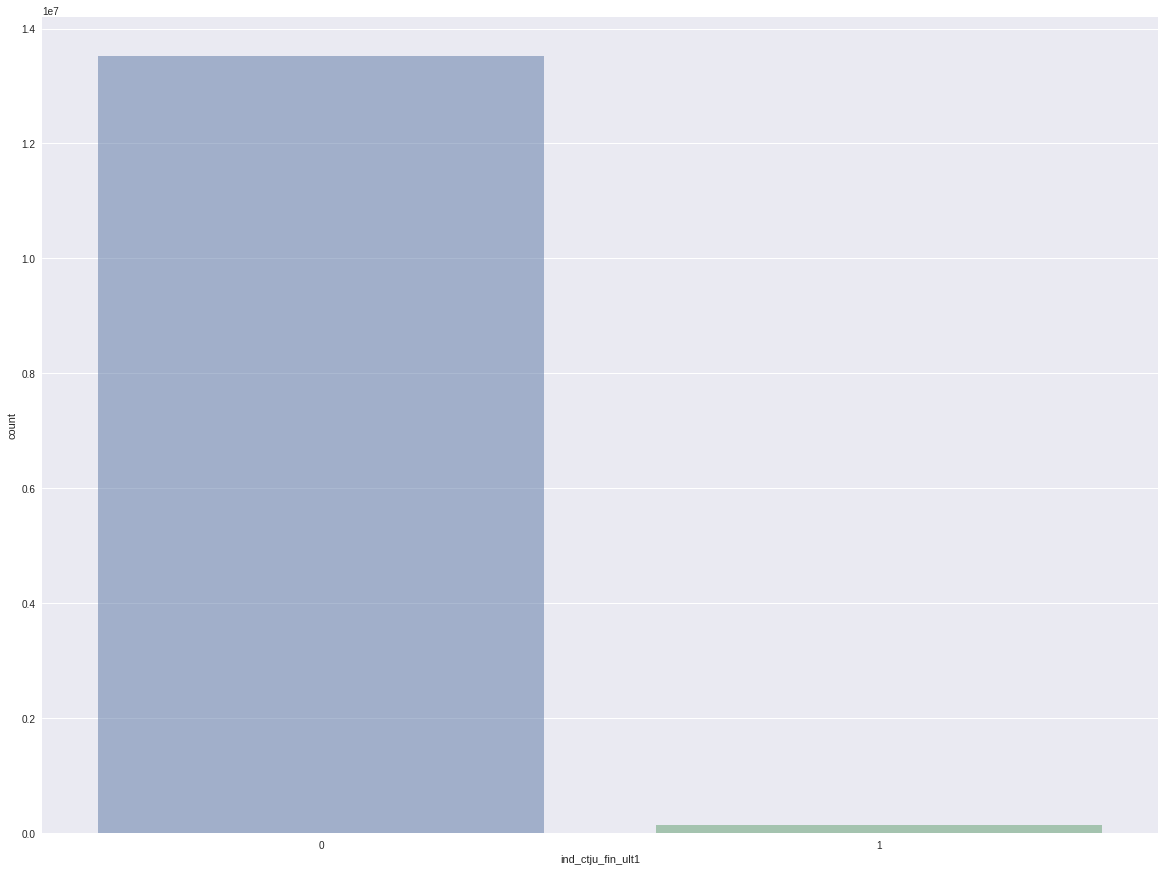

--------------------------------------------------
col :  ind_ctma_fin_ult1


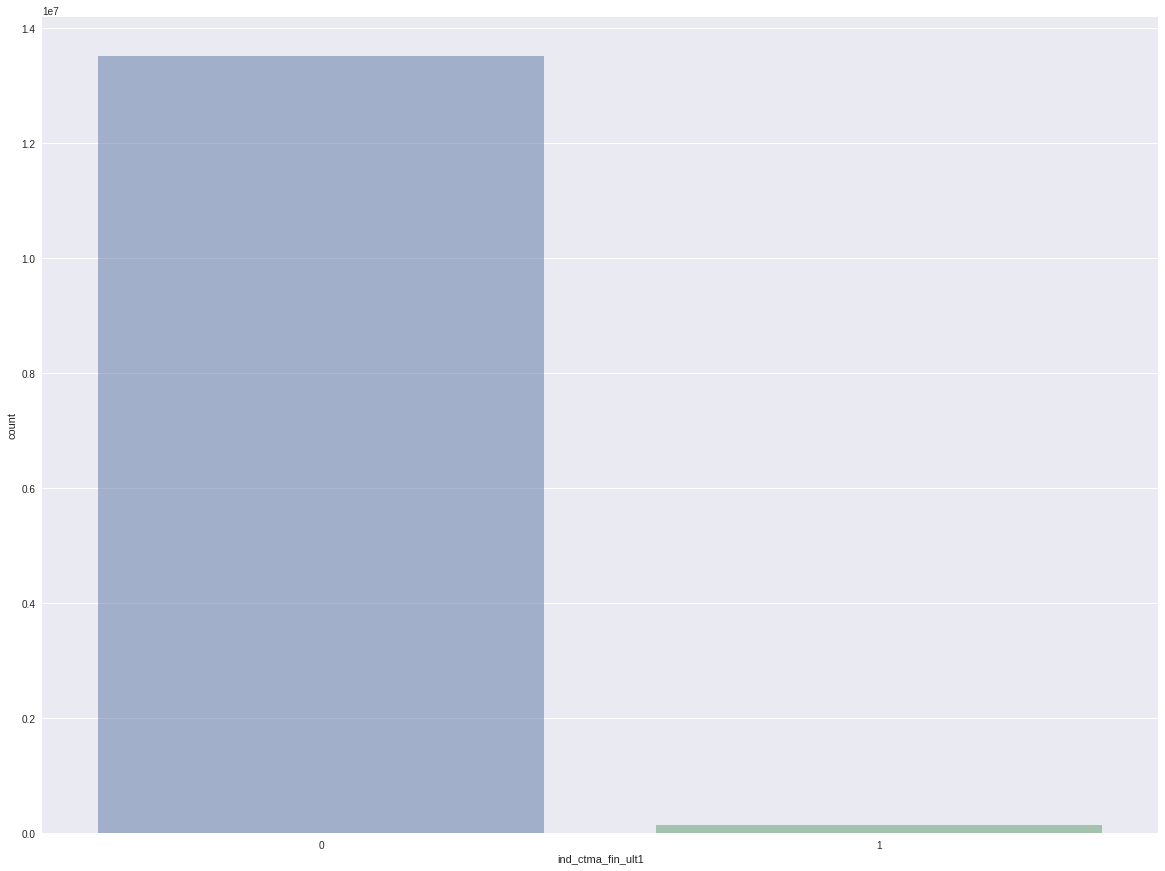

--------------------------------------------------
col :  ind_ctop_fin_ult1


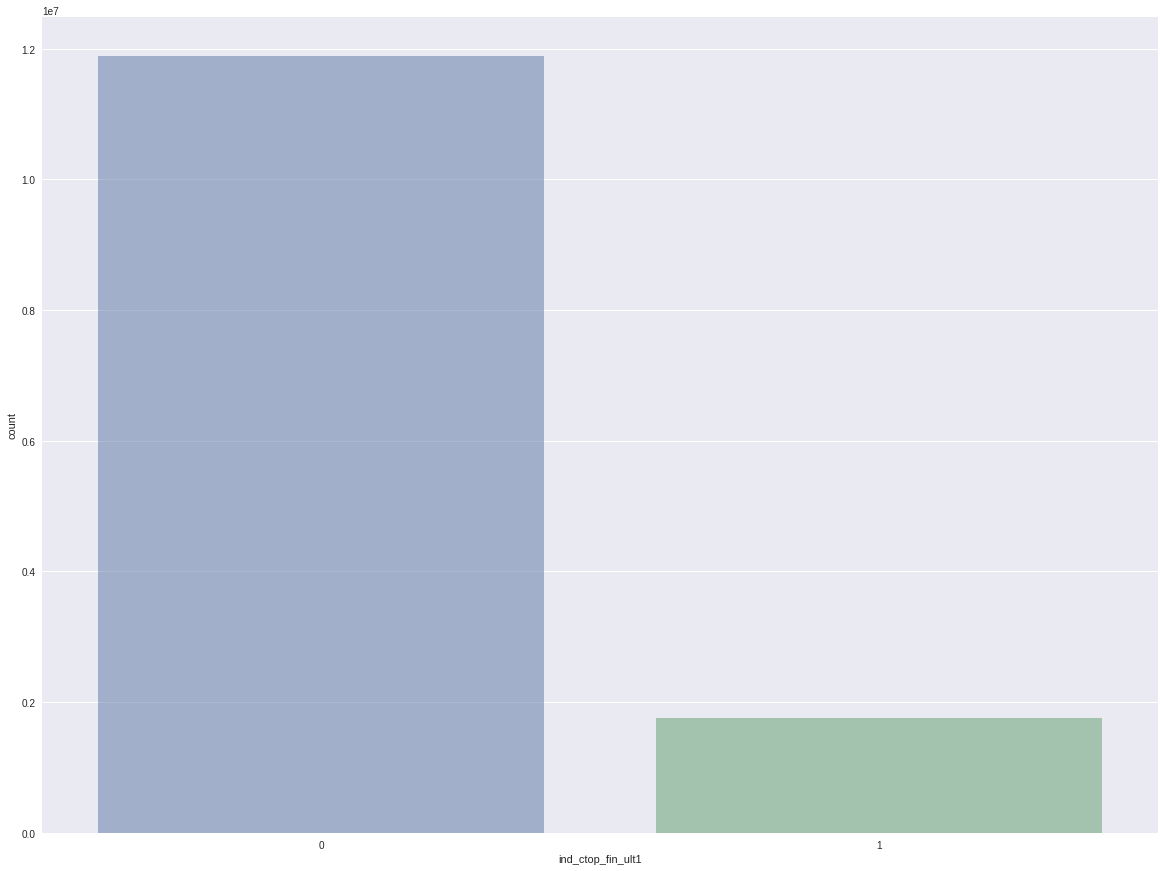

--------------------------------------------------
col :  ind_ctpp_fin_ult1


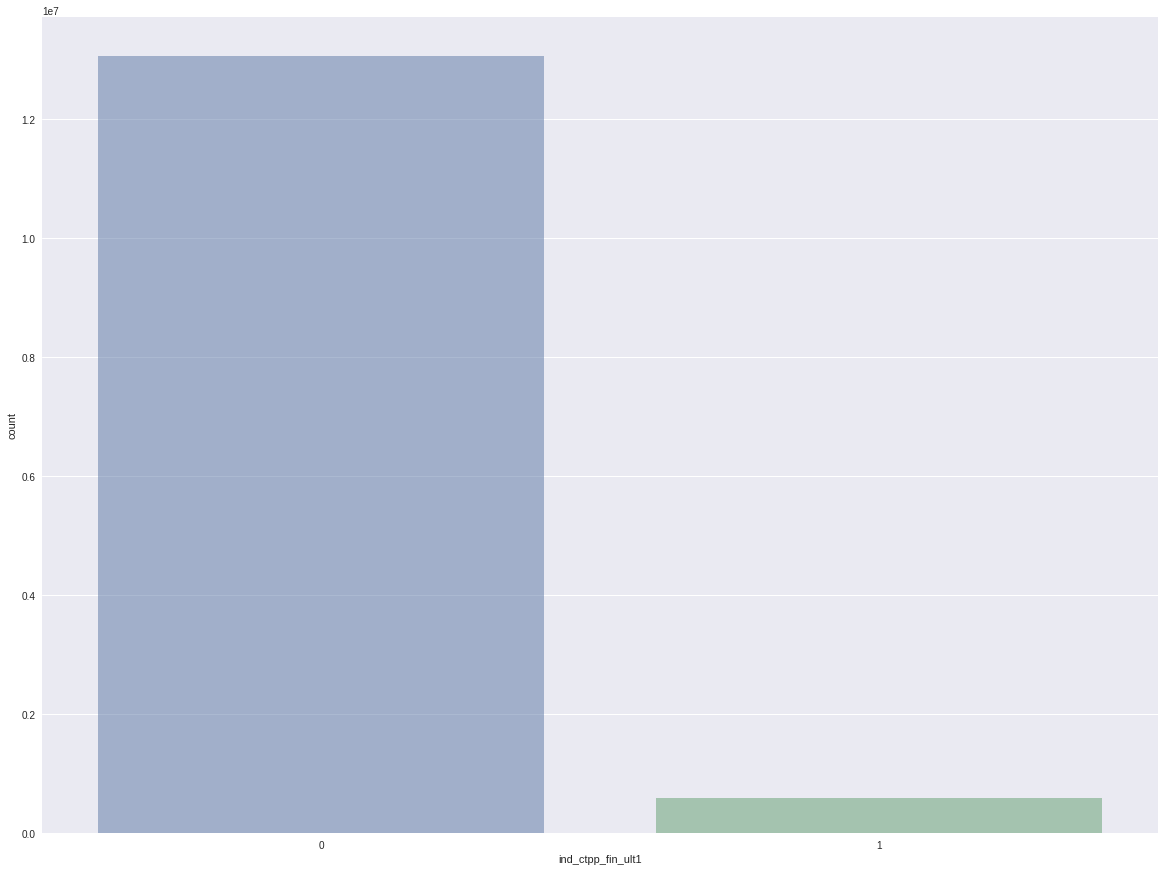

--------------------------------------------------
col :  ind_deco_fin_ult1


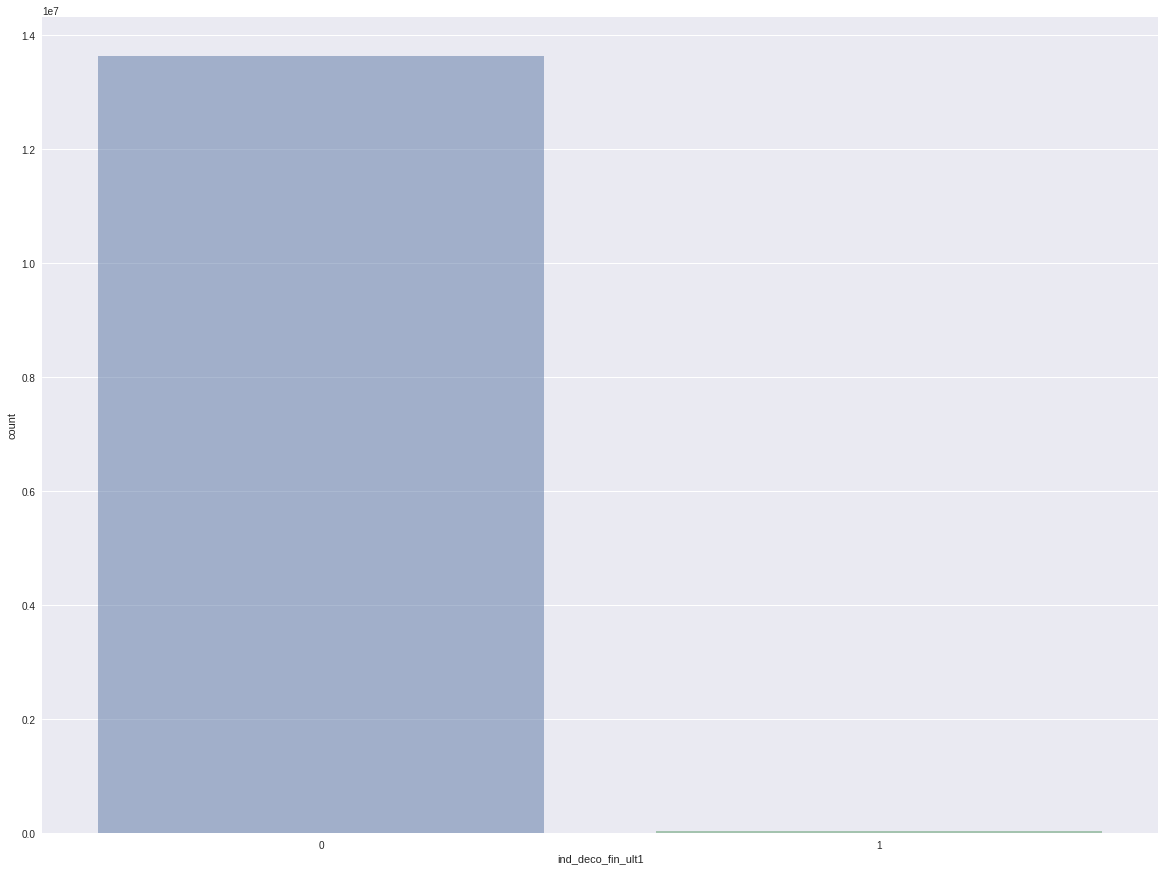

--------------------------------------------------
col :  ind_deme_fin_ult1


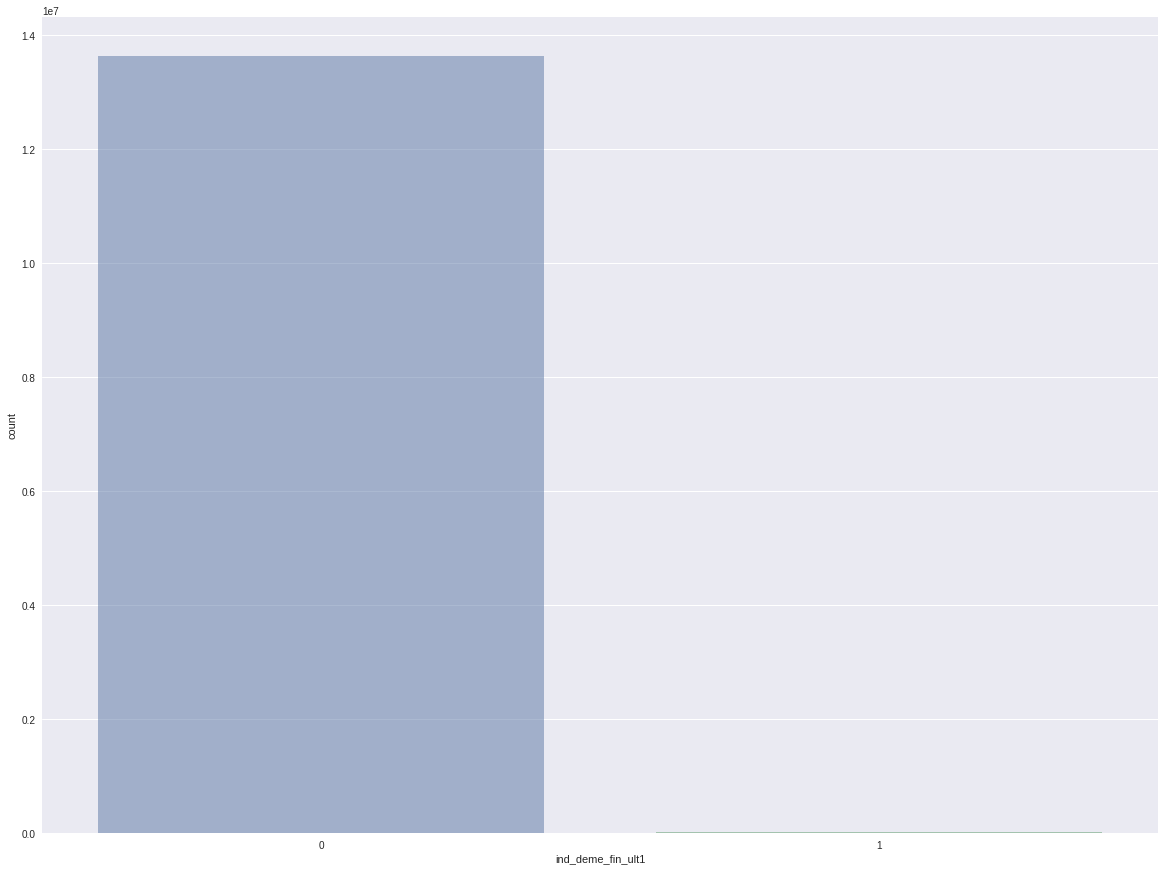

--------------------------------------------------
col :  ind_dela_fin_ult1


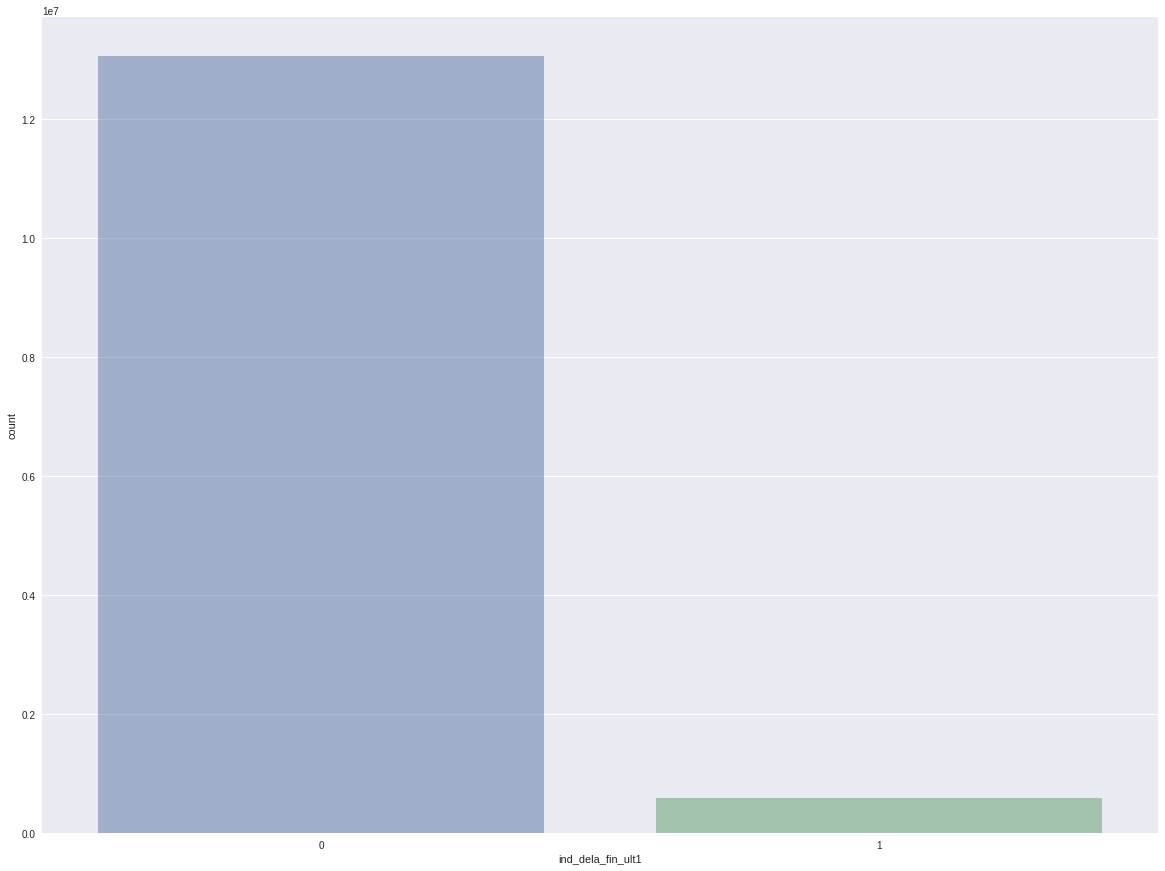

--------------------------------------------------
col :  ind_ecue_fin_ult1


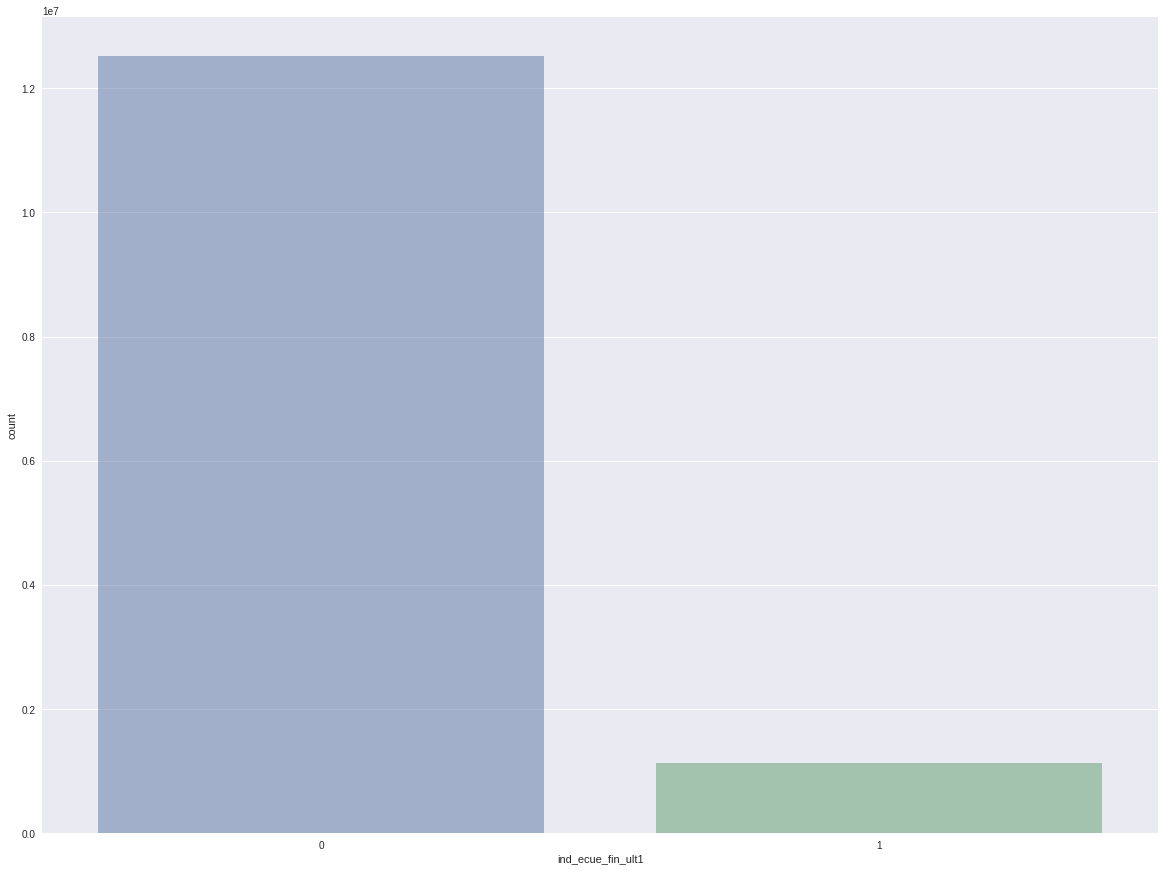

--------------------------------------------------
col :  ind_fond_fin_ult1


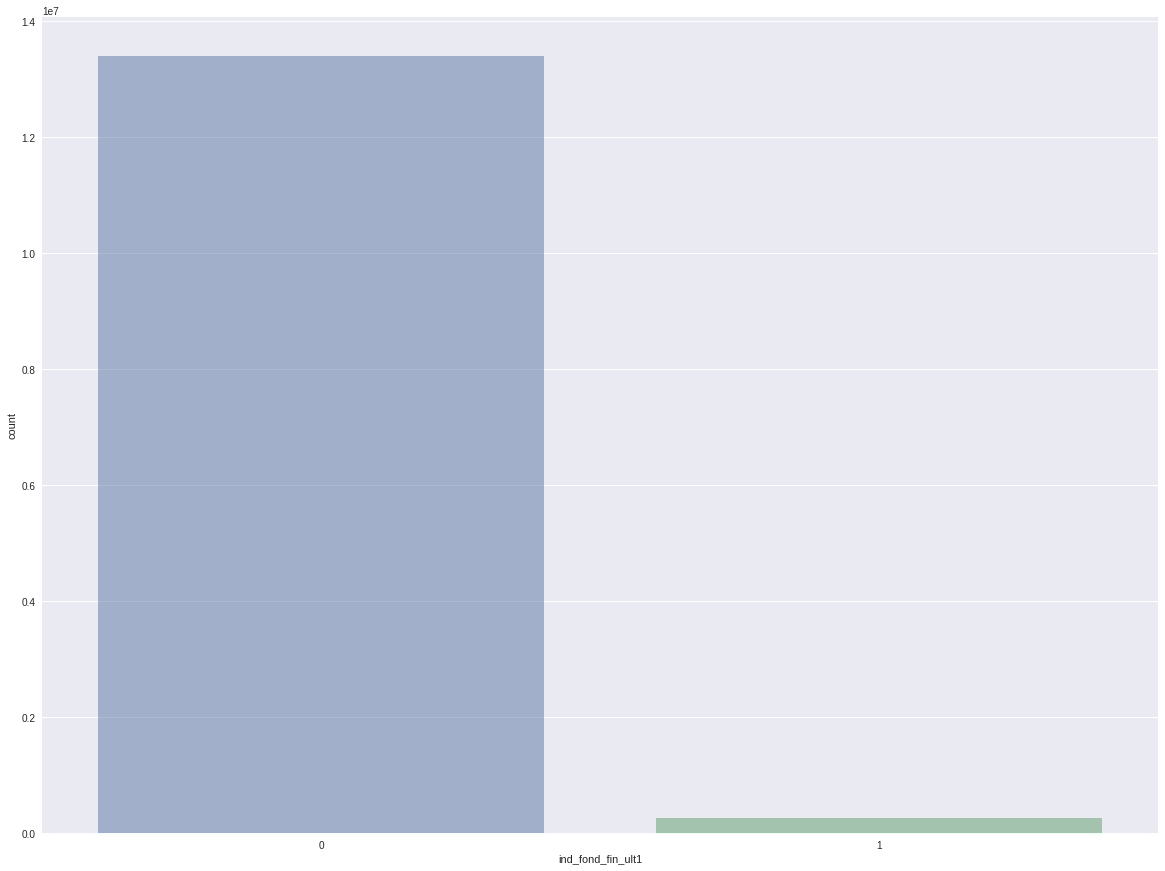

--------------------------------------------------
col :  ind_hip_fin_ult1


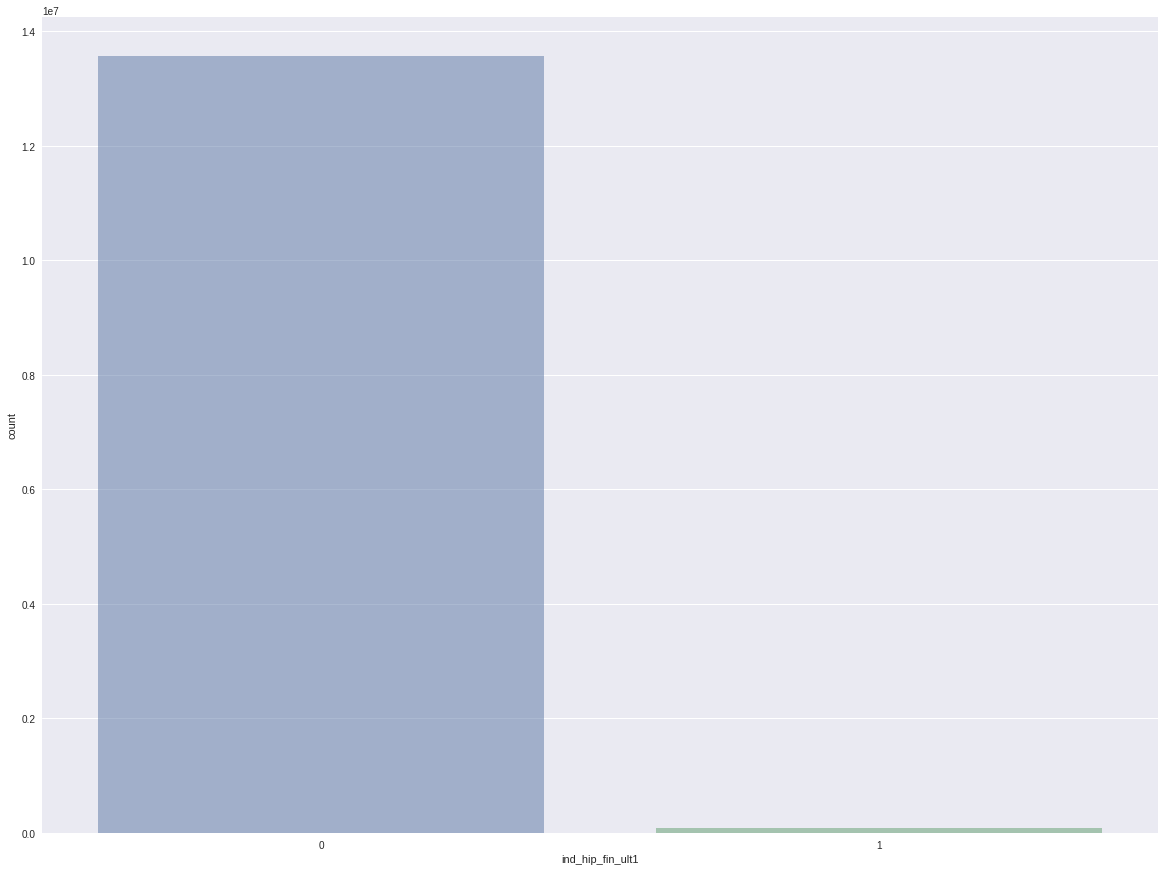

--------------------------------------------------
col :  ind_plan_fin_ult1


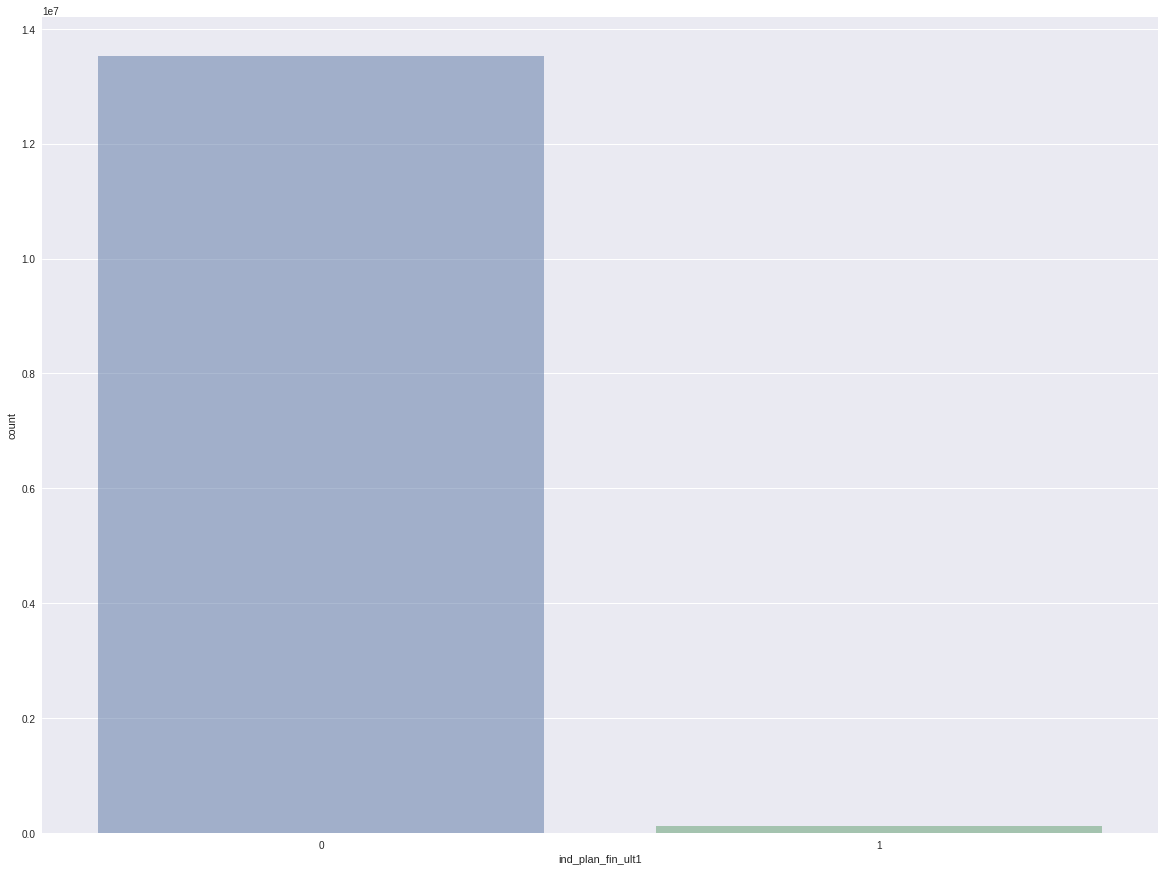

--------------------------------------------------
col :  ind_pres_fin_ult1


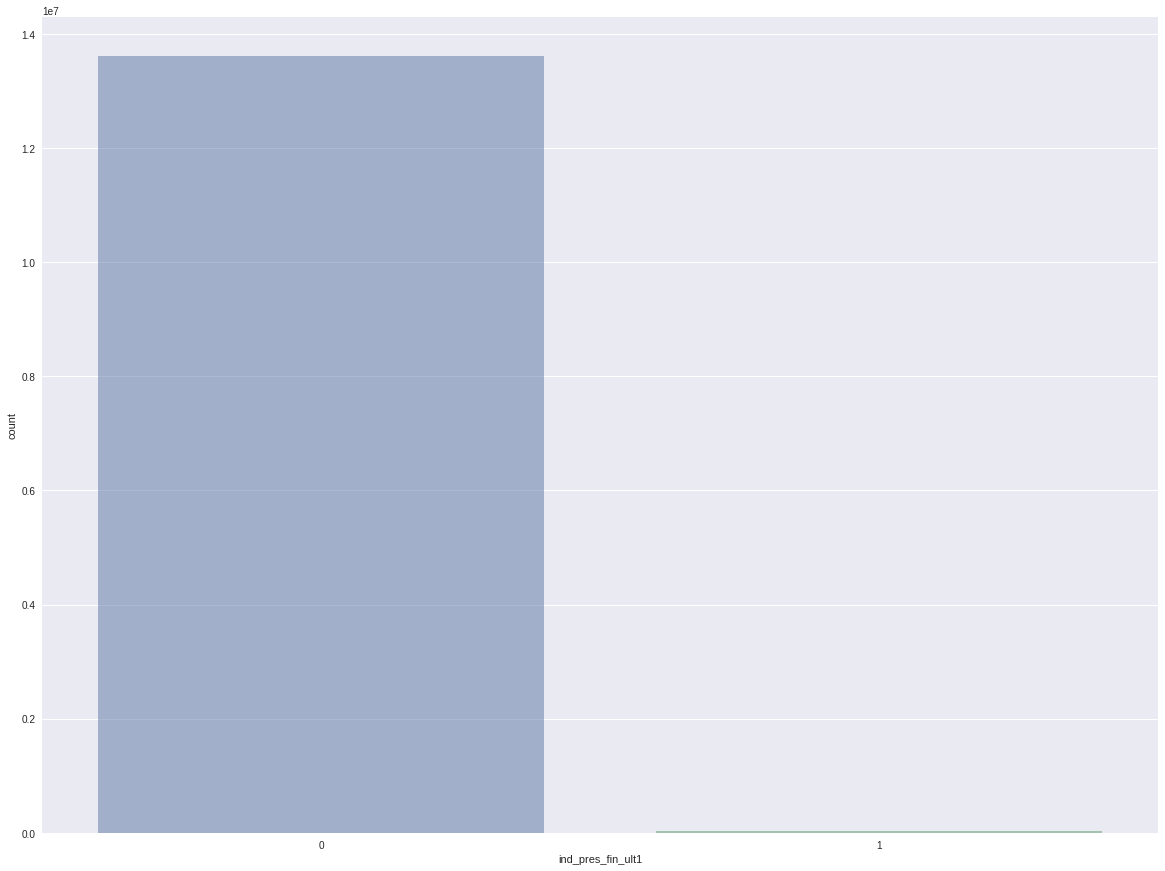

--------------------------------------------------
col :  ind_reca_fin_ult1


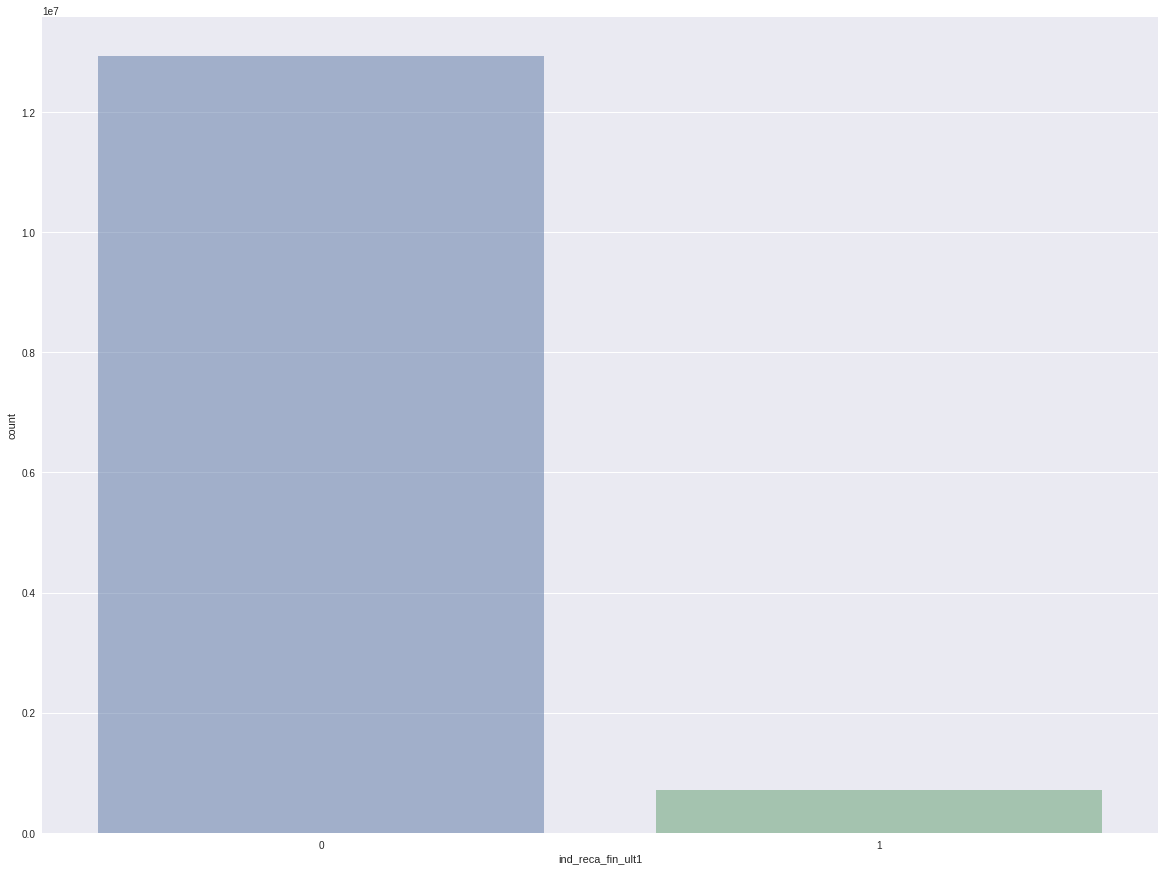

--------------------------------------------------
col :  ind_tjcr_fin_ult1


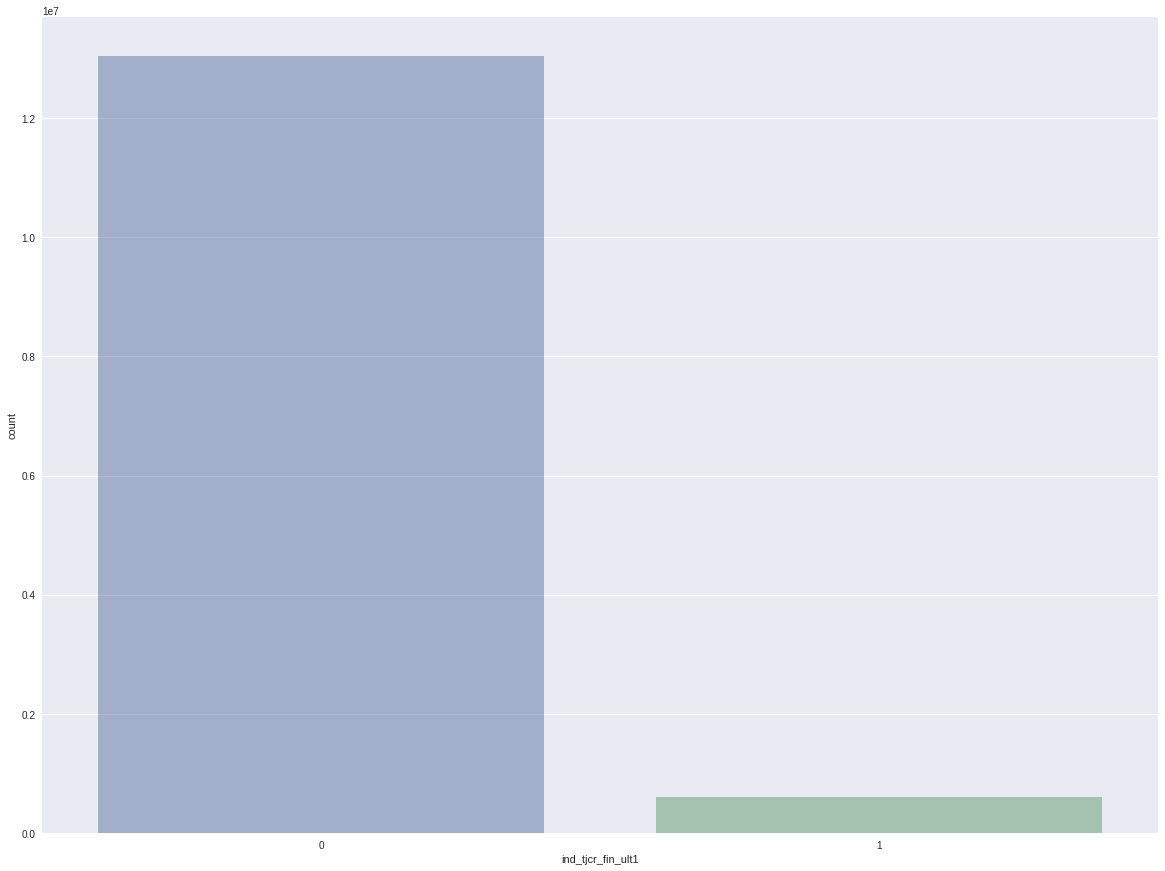

--------------------------------------------------
col :  ind_valo_fin_ult1


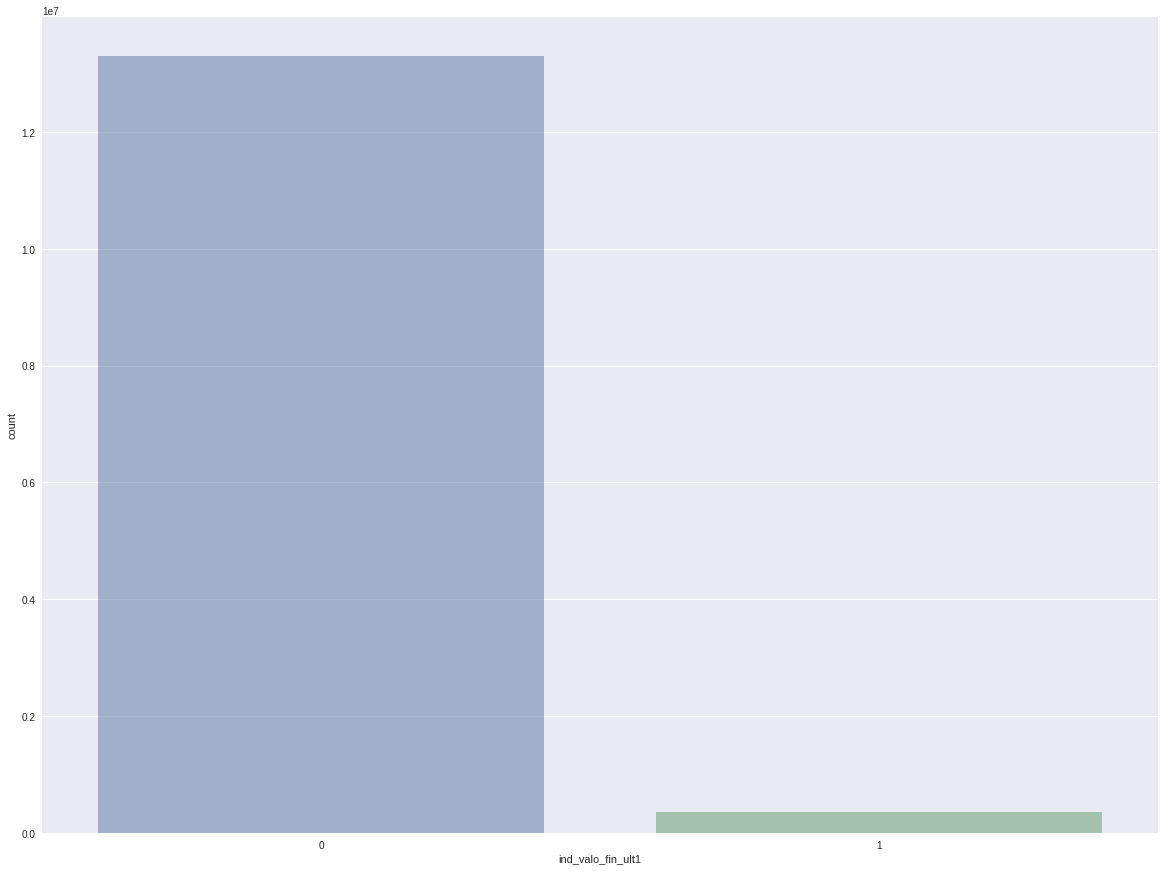

--------------------------------------------------
col :  ind_viv_fin_ult1


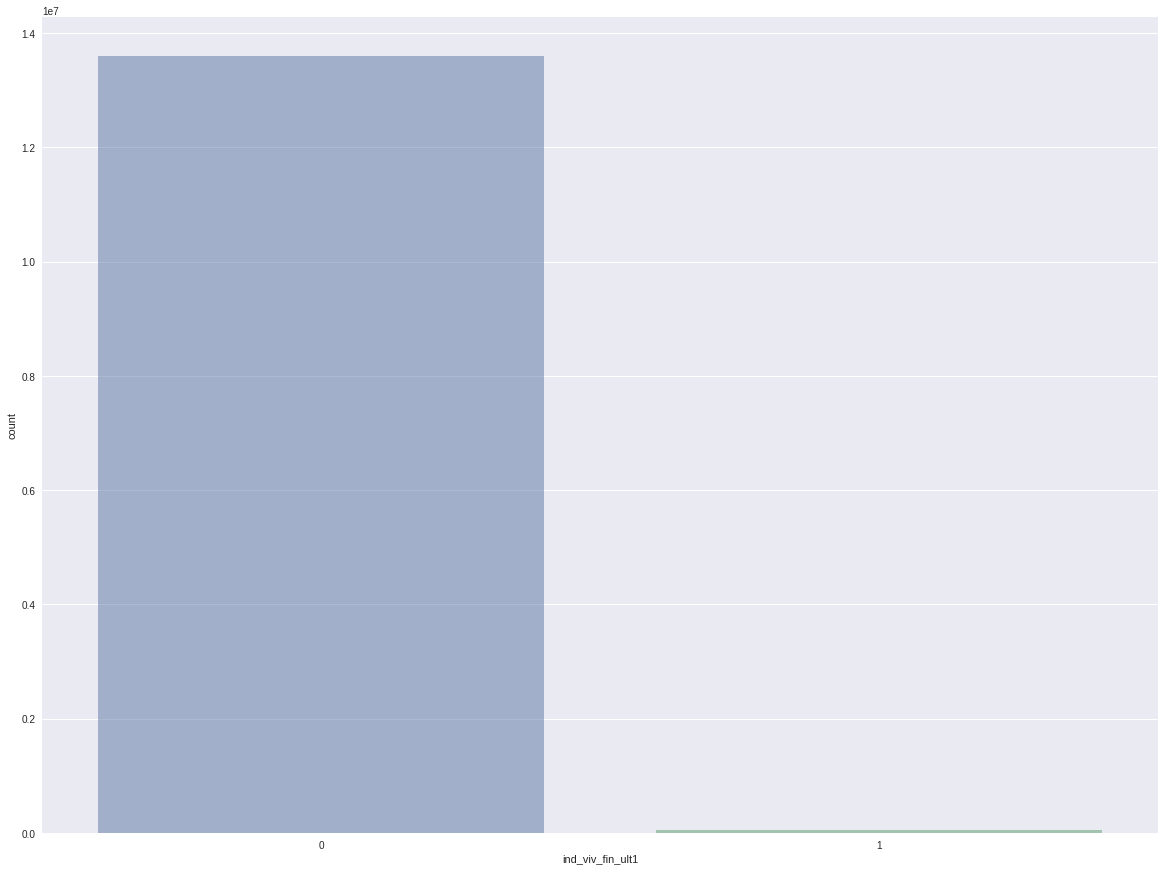

--------------------------------------------------
col :  ind_nomina_ult1


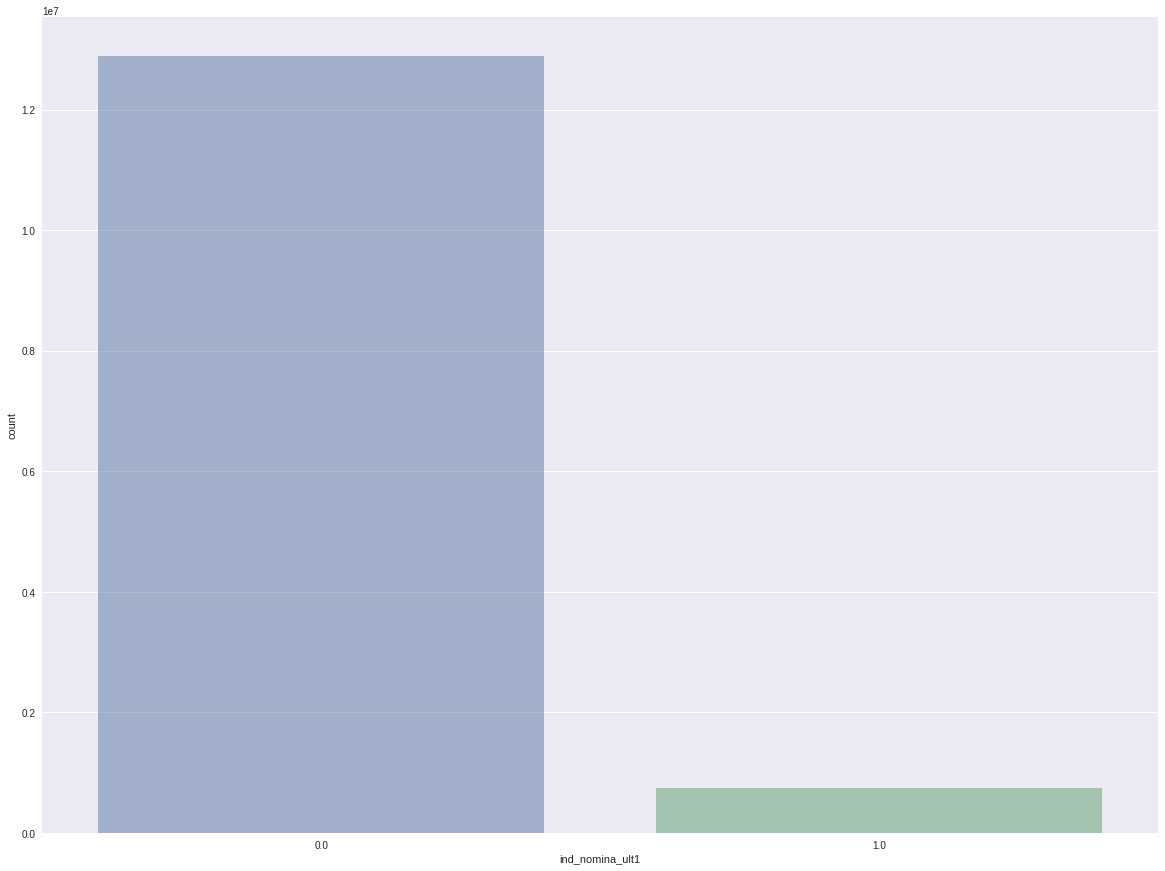

--------------------------------------------------
col :  ind_nom_pens_ult1


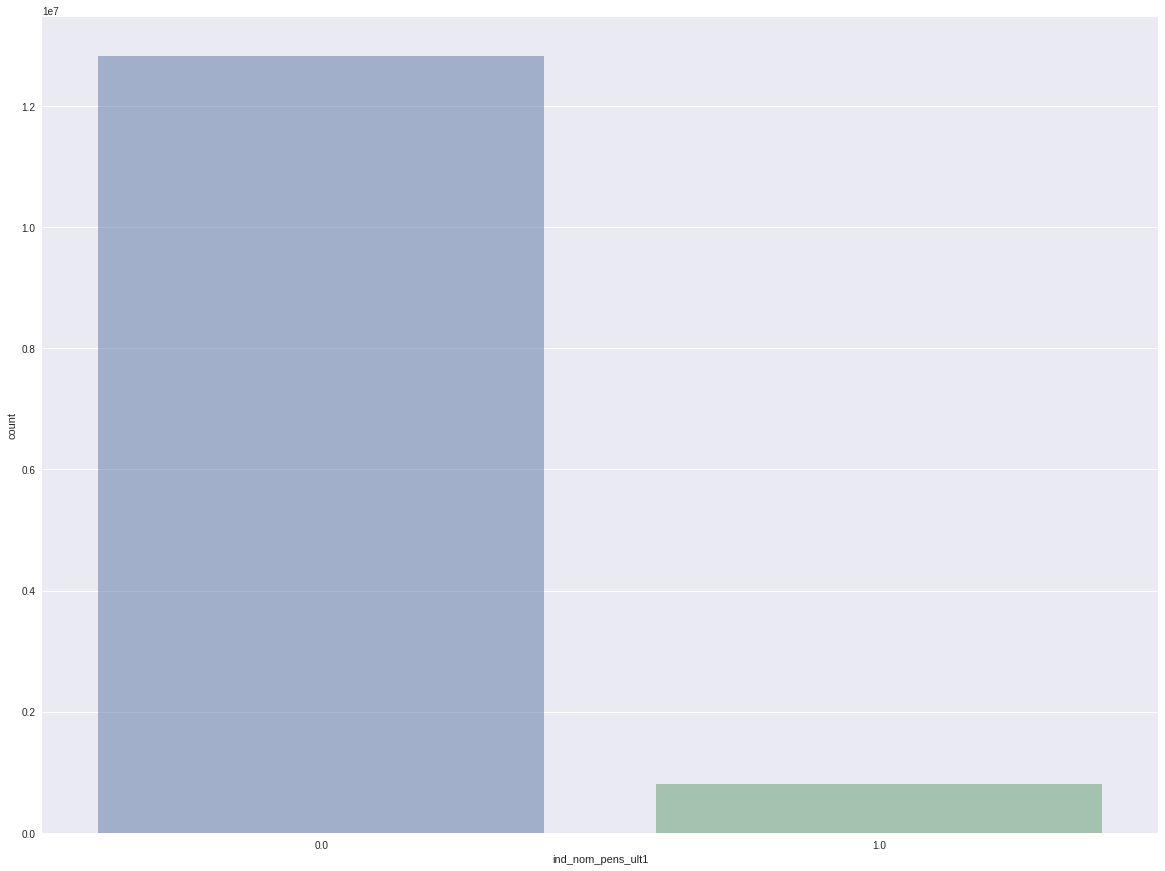

--------------------------------------------------
col :  ind_recibo_ult1


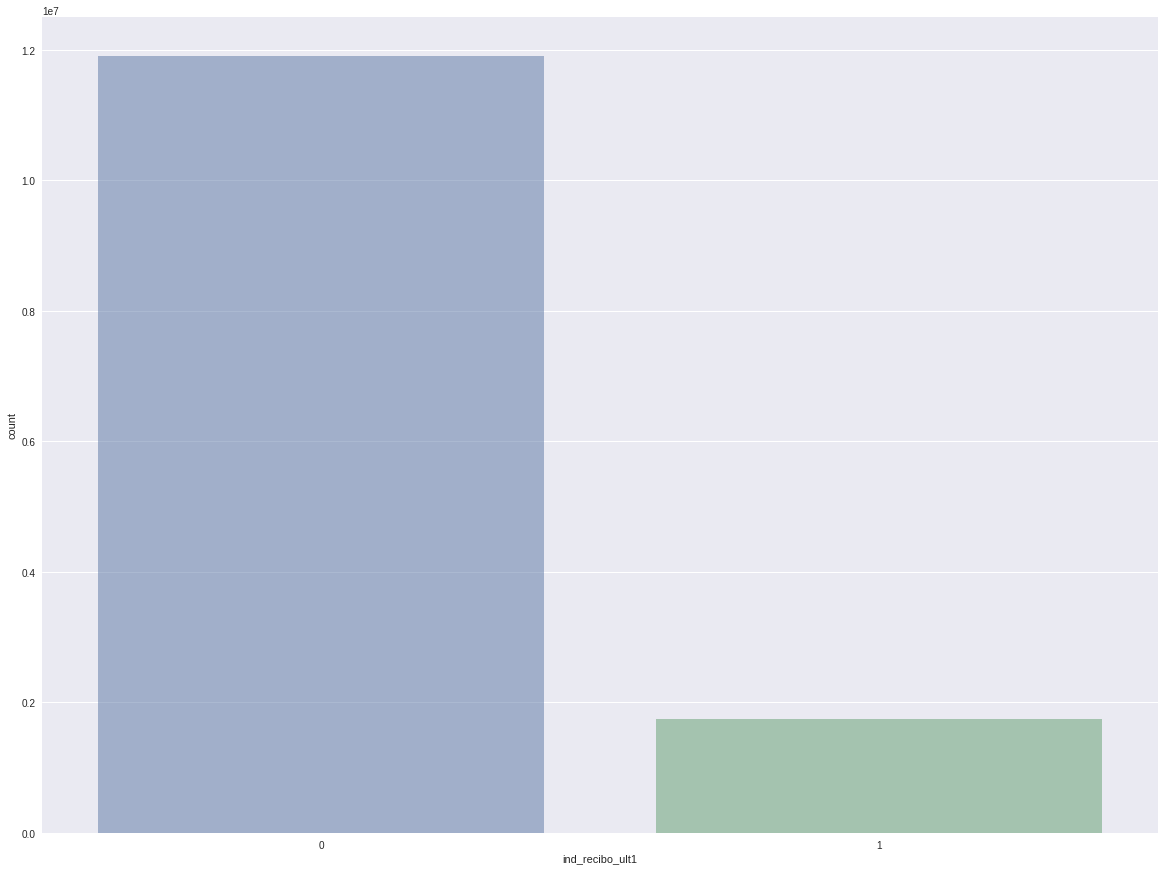

In [16]:
skip_cols = ['ncodpers', 'renta']
for col in trn.columns:
    if col in skip_cols:
        continue
        
    print('-' * 50)
    print('col : ', col)
    
    f, ax = plt.subplots(figsize=(20,15))
    sns.countplot(x=col, data=trn, alpha=0.5)
    plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


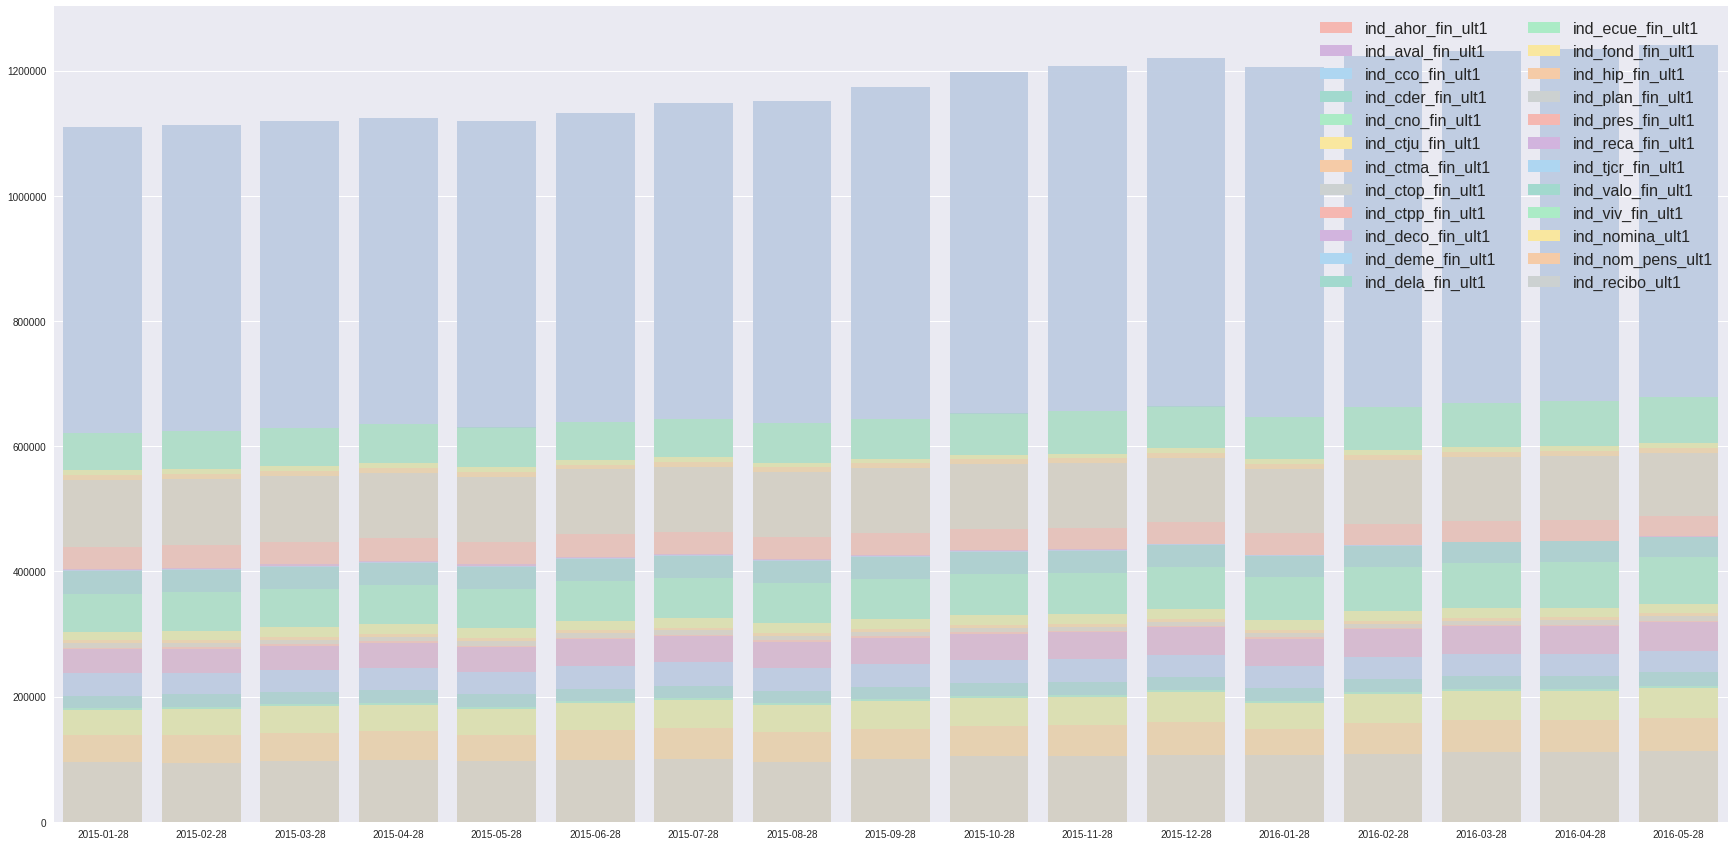

In [17]:
# 날짜 데이터를 기준으로 분석하기 위하여, 날짜 데이터를 별도로 추출하자.
month = trn['fecha_dato'].unique().tolist()
# 제품 변수 24개를 추출하자.
label_cols = trn.columns[24:].tolist()

label_over_time = []

for i in range(len(label_cols)):
    # 매월 각 제품의 총합을 groupb(..).agg('sum')으로 계산하여 label_sum에 저장
    label_sum = trn.groupby(['fecha_dato'])[label_cols[i]].agg('sum')
    label_over_time.append(label_sum.tolist())
    
label_sum_over_time = []

for i in range(len(label_cols)):
    # 누적 막대 그래프 생성을 위해, n번째 제품의 총합은 1 ~ n 번째 제품의 총합으로 만든다.
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))
    

color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1', '#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

f, ax = plt.subplots(figsize=(30,15))
for i in range(len(label_cols)):
    sns.barplot(x=month, y=label_sum_over_time[i], alpha=0.7, color = color_list[i%8])
    
plt.legend([plt.Rectangle((0,0), 1, 1, fc=color_list[i%8] , edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size':16})

In [19]:
label_sum_over_time_df = pd.DataFrame(label_sum_over_time)

label_sum_over_time_df.index = [label_cols]
label_sum_over_time_df.columns = [month]

label_sum_over_time_df.T

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
2015-01-28,1109367.0,1109279.0,1109260.0,621405.0,621104.0,562341.0,554584.0,546166.0,439695.0,403500.0,...,290111.0,285104.0,277674.0,275325.0,237037.0,201424.0,181161.0,177927.0,138932.0,95601.0
2015-02-28,1112733.0,1112644.0,1112624.0,623966.0,623665.0,563637.0,555947.0,547719.0,441676.0,405636.0,...,291124.0,286126.0,278719.0,276375.0,237868.0,203516.0,183318.0,180099.0,139353.0,94543.0
2015-03-28,1118829.0,1118740.0,1118719.0,629645.0,629330.0,568401.0,560727.0,552852.0,447164.0,411317.0,...,295932.0,290944.0,283560.0,281220.0,242493.0,207503.0,187483.0,184287.0,141320.0,97211.0
2015-04-28,1124795.0,1124708.0,1124687.0,635618.0,635305.0,573084.0,565431.0,557949.0,452782.0,417132.0,...,300735.0,295767.0,288397.0,286051.0,246448.0,210460.0,190521.0,187348.0,144905.0,98312.0
2015-05-28,1119858.0,1119773.0,1119752.0,630015.0,629702.0,566311.0,558664.0,551568.0,446621.0,411122.0,...,293766.0,288969.0,281606.0,279264.0,239318.0,203438.0,183483.0,180328.0,138945.0,96487.0
2015-06-28,1132501.0,1132418.0,1132397.0,638370.0,638054.0,578209.0,570613.0,563693.0,459091.0,423749.0,...,306257.0,301536.0,294173.0,292133.0,249245.0,212695.0,193020.0,189882.0,146358.0,98655.0
2015-07-28,1147960.0,1147878.0,1147859.0,643956.0,643636.0,582029.0,574447.0,567508.0,463220.0,428075.0,...,310348.0,305641.0,298296.0,296272.0,254493.0,217334.0,197635.0,194507.0,149570.0,99981.0
2015-08-28,1151798.0,1151716.0,1151697.0,636870.0,636547.0,573550.0,565994.0,559001.0,454948.0,419938.0,...,301853.0,297160.0,289814.0,287791.0,245770.0,208950.0,189001.0,185893.0,143105.0,96045.0
2015-09-28,1173705.0,1173624.0,1173605.0,643997.0,643678.0,579919.0,572398.0,565218.0,461538.0,426743.0,...,308206.0,303524.0,296181.0,294157.0,251890.0,215642.0,195487.0,192397.0,148724.0,100726.0
2015-10-28,1198063.0,1197982.0,1197964.0,652448.0,652131.0,586682.0,579158.0,571707.0,468408.0,433769.0,...,314770.0,310105.0,302765.0,300745.0,257913.0,221860.0,201047.0,197980.0,153323.0,104427.0


* 이번 대회에서 예측해야하는 값은 고객이 신규로 구매할 제품이다.
* 보유여부가 0에서 1로 변하는 그 순간에 관심이 있는 것이지, 구매 후 지속적으로 해당 제품을 보유하고 있는지는 상관없음
* 따라서 신규구매에 대한 월별 추이를 반드시 확인해야 함
* 아래에서 제품별로 신규구매여부를 추출하기 위한 코드를 살펴보자

In [20]:
print('===== Memory =====')
!cat /proc/meminfo # 사용 가능한 메모리 다시 확인, 아래 코드 중에 train 데이터를 copy하는 코드가 있어서 메모리가 부족할수도 있음

===== Memory =====
MemTotal:       13335212 kB
MemFree:          175516 kB
MemAvailable:    6411388 kB
Buffers:           19136 kB
Cached:           923348 kB
SwapCached:            0 kB
Active:          6872816 kB
Inactive:        6063032 kB
Active(anon):    6486904 kB
Inactive(anon):      328 kB
Active(file):     385912 kB
Inactive(file):  6062704 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               316 kB
Writeback:             0 kB
AnonPages:      11991380 kB
Mapped:           112324 kB
Shmem:               844 kB
Slab:              87064 kB
SReclaimable:      57832 kB
SUnreclaim:        29232 kB
KernelStack:        4032 kB
PageTables:        36256 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667604 kB
Committed_AS:   18135028 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 k

In [0]:
# 날짜를 숫자로 변환하는 함수 (2015-01-18 -> 1, 2016-06-28 -> 18)

def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")]
    int_date = (int(Y) - 2015) * 12 + int(M)
    return int_date

# train 데이터에 날짜를 숫자로 변환한 칼럼을 추가

trn['int_date'] = trn['fecha_dato'].map(date_to_int).astype(np.int8)

# 데이터를 복사한 후, lag-1 데이터를 생성한다.

trn_lag = trn.copy()
trn_lag['int_date'] += 1
trn_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in trn.columns]

# lag 데이터를 원래 데이터와 합침 (고객번호와 날짜를 기준으로 left join)
df_trn = trn.merge(trn_lag, on=['ncodpers','int_date'], how='left')

# 불필요한 데이터 삭제
del trn, trn_lag

# 저번 달의 제품 정보가 없을 경우 0으로 대체
for prod in product:
    prev = prod + '_prev'
    df_trn[prev].fillna(0, inplace=True)
    
# 원본 데이터와 lag 데이터의 제품보유여부를 비교하여 신규 구매 변수 padd를 추가
for prod in product:
    padd = prod + '_add'
    prev = prod + '_prev'
    df_trn[padd] = ((df_trn[prod] == 1) & (df_trn[prev] == 0)).astype(np.int8)
    
# 신규 구매 변수를 labels에 저장
add_cols = [prod + '_add' for prod in product]
labels = df_trn[add_cols].copy()
labels.columns = product
labels.to_csv("/content/gdrive/My Drive/santander/labels.csv", index = False)